This notebook generates and saves simulation data later used for plotting. Also, function usage from _utils_simulation.py_ and _utils_analytics.py_ is demonstrated

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.size'] = 16
rcParams['lines.linewidth'] = 2

from ComptonSpec_classic import Trajectory, Spectrum
from utils_simulation import *
from utils_analytics import *

## Example of gauss_spectral laser pulse and its spectra

In [2]:
u0, r0 = np.array([0.,0.,0.]), np.array([0.,0.,0.])
traj = Trajectory(u0, r0)

# Laser pulse parameters
tau = 2 * np.pi    # Pulse duration
a0 = 1             # Pulse amplitude
mode = 'gauss_spectral'   # Temporal envelope
beta = 4            # Chirp parameter
polarization = 'circular'

# Define laser phase grid and calculate vector potential
eta_b = 4.4*tau*np.sqrt(1+beta**2)
eta = np.linspace(-eta_b, eta_b, int(2*eta_b*100))
A = calc_A(eta, mode, tau, a0, beta)
u, r = traj.calc_u_x(A, eta)

# Calculate spectrum
spec = Spectrum(eta, u, r)

theta = np.pi
phi = 0
I, w = spec.calc_spectrum_I_w(theta=theta, phi=phi)

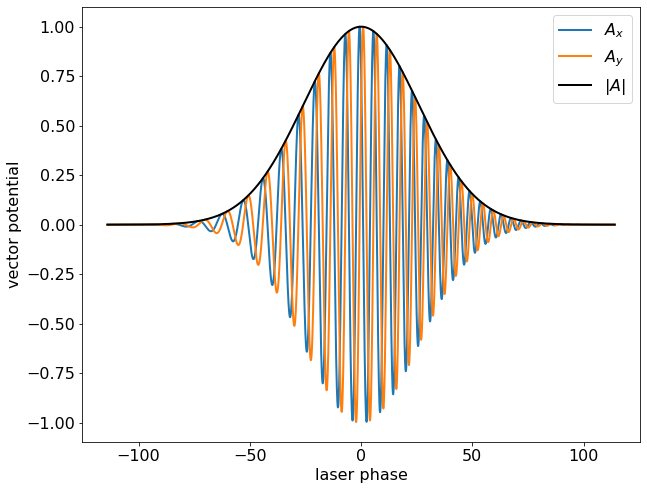

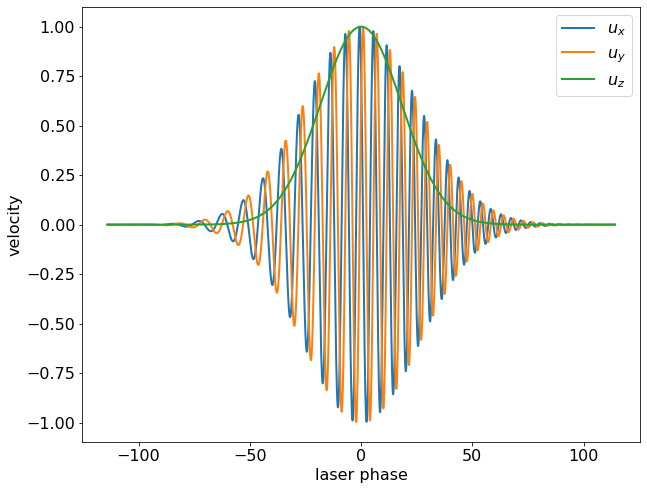

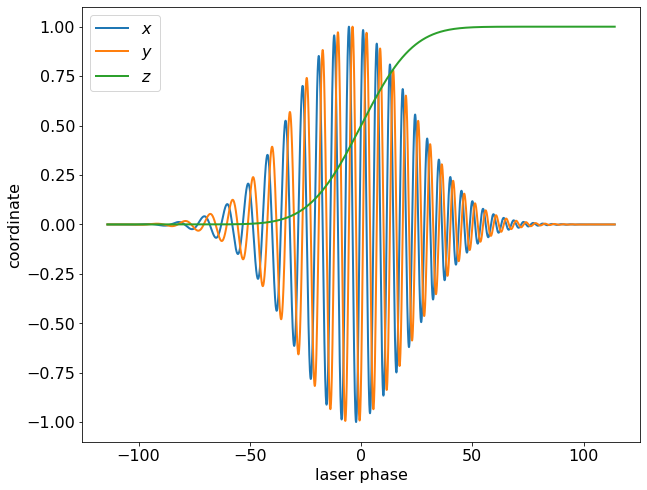

In [3]:
# Plot electron velocity and coordinate

A_mod = np.sqrt(A[0]**2 + A[1]**2)

fig, ax = plt.subplots(figsize=(10,8))
plt.plot(eta, A[0]/np.max(A[0]), label='$A_x$')
plt.plot(eta, A[1]/np.max(A[1]), label='$A_y$')
plt.plot(eta, A_mod/np.max(A_mod), label='$|A|$', color='black')
plt.legend(loc='best')
plt.xlabel('laser phase')
plt.ylabel('vector potential')
plt.show()

fig, ax = plt.subplots(figsize=(10,8))
plt.plot(eta, u[0]/np.max(u[0]), label='$u_x$')
plt.plot(eta, u[1]/np.max(u[1]), label='$u_y$')
plt.plot(eta, u[2]/np.max(u[2]), label='$u_z$')
plt.legend(loc='best')
plt.xlabel('laser phase')
plt.ylabel('velocity')
plt.show()

fig, ax = plt.subplots(figsize=(10,8))
plt.plot(eta, r[0]/np.max(r[0]), label='$x$')
plt.plot(eta, r[1]/np.max(r[1]), label='$y$')
plt.plot(eta, r[2]/np.max(r[2]), label='$z$')
plt.legend(loc='best')
plt.xlabel('laser phase')
plt.ylabel('coordinate')
plt.show()

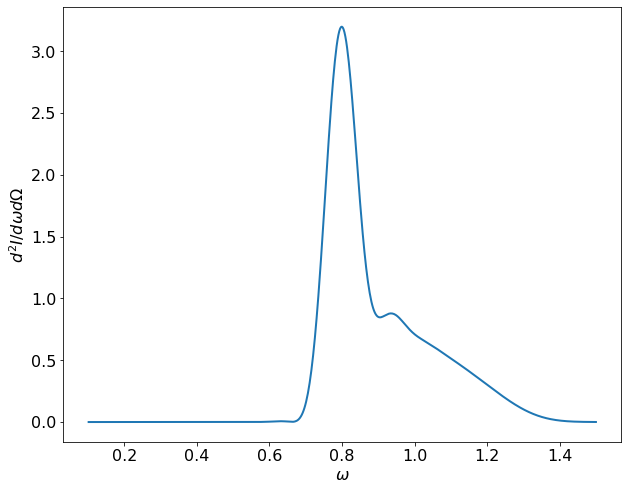

In [4]:
# Plot spectrum I(w)
w0, w1 = [0.1, 1.5]
idx = (w >= w0) & (w <= w1)
w_plot, I_plot = w[idx], I[idx]

fig, ax = plt.subplots(figsize=(10,8))
plt.plot(w_plot, I_plot, label='numerical')
plt.xlabel('$\omega$')
plt.ylabel('$d^2 I / d\omega d\Omega$')
plt.show()

## Data generation for laser pulses with $\tau = 2\pi, 4\pi, 6\pi$

### $\tau = 2\pi$: data generation

In [11]:
mode = 'gauss_spectral'
polarization = 'circular'
tau = 2 * np.pi

# Define grid over beta
beta_start, beta_end = [0., 35.]
n_beta_unit = 6
beta_arr = np.linspace(beta_start, beta_end, int((beta_end-beta_start)*n_beta_unit+1))

# Define grid over a0
a0_start, a0_end = [0.5, 3.25]
n_a0_unit = 8
a0_arr = np.linspace(a0_start, a0_end, int((a0_end-a0_start)*n_a0_unit)+1)

# Frequency interval
wb = [.0, 1.4]

# Proceed with calculations
results = a0_beta_scan_classic(beta_arr, a0_arr, tau, wb=wb, mode=mode, polarization=polarization)
w_a0_list, N_ph_a0_list, N_max_a0_list, beta_optimal = results

i = 0, Calculation is finished!
i = 1, Calculation is finished!
i = 2, Calculation is finished!
i = 3, Calculation is finished!
i = 4, Calculation is finished!
i = 5, Calculation is finished!
i = 6, Calculation is finished!
i = 7, Calculation is finished!
i = 8, Calculation is finished!
i = 9, Calculation is finished!
i = 10, Calculation is finished!
i = 11, Calculation is finished!
i = 12, Calculation is finished!
i = 13, Calculation is finished!
i = 14, Calculation is finished!
i = 15, Calculation is finished!
i = 16, Calculation is finished!
i = 17, Calculation is finished!
i = 18, Calculation is finished!
i = 19, Calculation is finished!
i = 20, Calculation is finished!
i = 21, Calculation is finished!
i = 22, Calculation is finished!


In [5]:
folder = 'data/simulation/tau_2'

In [12]:
# Transforming and saving the data
N_max_beta_a0 = transform_N_ph_list_to_arr(N_ph_a0_list)
w_a0_list_interp, N_ph_a0_list_interp = interpolate_spectra_for_a0_arr(w_a0_list, N_ph_a0_list, a0_arr)

save_data_fixed_tau(w_a0_list_interp, N_ph_a0_list_interp, beta_arr, a0_arr, N_max_beta_a0,
                    beta_optimal, folder=folder)

Saving is finished


In [6]:
# Loading data
data = load_data_fixed_tau(folder=folder)
w_a0_list_tau_2, N_ph_a0_list_tau_2 = data[:2]
beta_arr_tau_2, a0_arr_tau_2, N_max_beta_a0_tau_2, beta_optimal_tau_2 = data[2:]

In [18]:
# Generate analytics
tau = 2 * np.pi

beta_start, beta_end = [0., 70.]
n_beta = 50
beta_arr = np.linspace(beta_start, beta_end, int((beta_end-beta_start)*n_beta+1))

a0_start, a0_end = [0.5, 3.5]
n_a0 = 40
a0_arr = np.linspace(a0_start, a0_end, int((a0_end - a0_start)*n_a0 + 1))

# Solve cusp-on-axis equation and Pearcey maximum equations
beta_cusp, err_cusp = solve_cusp_equation_for_a0_arr(beta_arr, a0_arr, tau)
beta_Pe, w_Pe, err_Pe = solve_Pearcey_max_equation_for_a0_arr(beta_arr, a0_arr, tau)

# Calculate Taylor correction
beta_Taylor, w_Taylor = calculate_Taylor_correction_for_a0_arr(beta_Pe, w_Pe, a0_arr, tau)

In [7]:
folder = 'data/analytics/tau_2'

In [20]:
save_analytics_fixed_tau(beta_arr, a0_arr, beta_cusp, beta_Pe, w_Pe,
                         beta_Taylor, w_Taylor, folder)

Saving is finished


In [8]:
data = load_analytics_fixed_tau(folder)
beta_arr_th_tau_2, a0_arr_th_tau_2, beta_cusp_tau_2 = data[0], data[1], data[2]
beta_Pe_tau_2, w_Pe_tau_2 = data[3], data[4]
beta_Taylor_tau_2, w_Taylor_tau_2 = data[5], data[6]

### $\tau = 2\pi$: plots 

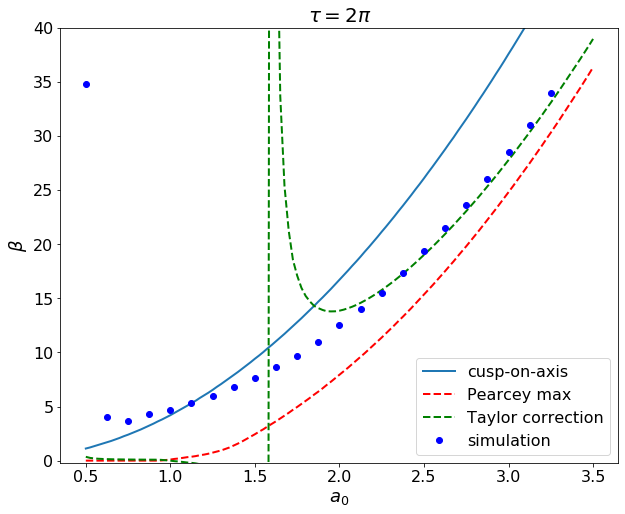

In [9]:
# Plot optimal beta(a0) for simulation, cusp-on-axis, Pearcey max and Taylor
# correction to Pearcey

fig, ax = plt.subplots(figsize=(10,8))

plt.plot(a0_arr_th_tau_2, beta_cusp_tau_2, color='tab:blue', label='cusp-on-axis')
plt.plot(a0_arr_th_tau_2, beta_Pe_tau_2, '--', color='red', label='Pearcey max')
plt.plot(a0_arr_th_tau_2, beta_Taylor_tau_2, '--', color='green', label='Taylor correction')

plt.plot(a0_arr_tau_2, beta_optimal_tau_2, 'o', color='blue', label='simulation')

ax.set_ylim([-0.2,40])
plt.title('$\\tau = 2\pi$', fontsize=20)
plt.xlabel('$a_0$', fontsize=18)
plt.ylabel('$\\beta$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.show()

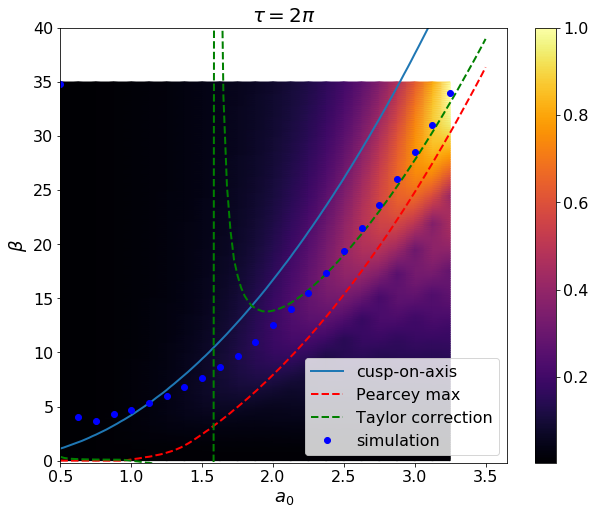

In [10]:
# The same plot but with N_ph_max as color background

fig, ax = plt.subplots(figsize=(10,8))

plt.pcolormesh(a0_arr_tau_2, beta_arr_tau_2, N_max_beta_a0_tau_2/N_max_beta_a0_tau_2.max(), cmap='inferno',
              shading='gouraud')
plt.colorbar()

plt.plot(a0_arr_th_tau_2, beta_cusp_tau_2, color='tab:blue', label='cusp-on-axis')
plt.plot(a0_arr_th_tau_2, beta_Pe_tau_2, '--', color='red', label='Pearcey max')
plt.plot(a0_arr_th_tau_2, beta_Taylor_tau_2, '--', color='green', label='Taylor correction')

plt.plot(a0_arr_tau_2, beta_optimal_tau_2, 'o', color='blue', label='simulation')

ax.set_ylim([-0.2,40])
plt.title('$\\tau = 2\pi$', fontsize=20)
plt.xlabel('$a_0$', fontsize=18)
plt.ylabel('$\\beta$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.show()

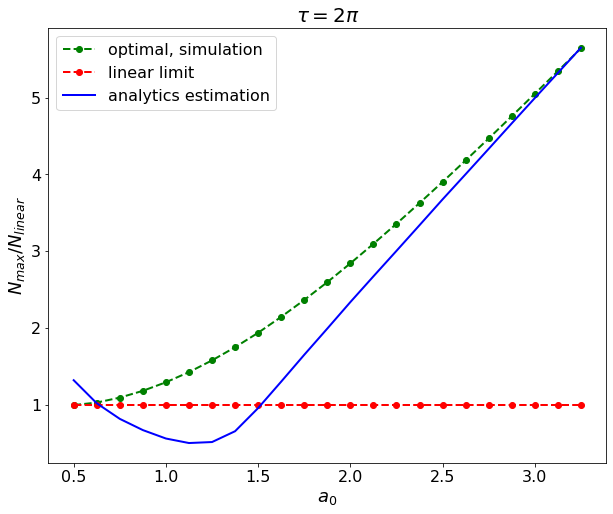

In [11]:
# Plot N_max(a0) for optimal beta parameters from numerics and analytics
tau = 2*np.pi

beta_cusp, _ = solve_cusp_equation_for_a0_arr(beta_arr_th_tau_2, a0_arr_tau_2, tau)
beta_Pe, w_Pe, _ = solve_Pearcey_max_equation_for_a0_arr(beta_arr_th_tau_2, a0_arr_tau_2, tau)
beta_Taylor, w_Taylor = calculate_Taylor_correction_for_a0_arr(beta_Pe, w_Pe, a0_arr_tau_2, tau)

tau_eff_cusp = tau * np.sqrt(1 + beta_cusp**2)
w_cusp = 1 - np.sqrt(2)*beta_cusp/tau_eff_cusp

data = collect_Nmax_arrays(a0_arr_tau_2, tau, beta_Pe, w_Pe, beta_optimal_tau_2, 
                           beta_arr_tau_2, N_max_beta_a0_tau_2)
Nmax_linear, Nmax_optimal, Nmax_estimation = data
Nmax_linear_norm = Nmax_linear / Nmax_linear
Nmax_optimal_norm = Nmax_optimal / Nmax_linear
Nmax_estimation_norm = Nmax_estimation / Nmax_linear


fig, ax = plt.subplots(figsize=(10,8))
plt.plot(a0_arr_tau_2, Nmax_optimal_norm, '--.', color='green', markersize=12, label='optimal, simulation')
plt.plot(a0_arr_tau_2, Nmax_linear_norm, '--.', color='red', markersize=12, label='linear limit')
plt.plot(a0_arr_tau_2, Nmax_estimation_norm, '-', color='blue', label='analytics estimation')
plt.title('$\\tau = 2\pi$', fontsize=20)
plt.xlabel('$a_0$', fontsize=18)
plt.ylabel('$N_{max}/N_{linear}$', fontsize=18)
plt.legend(loc='best', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

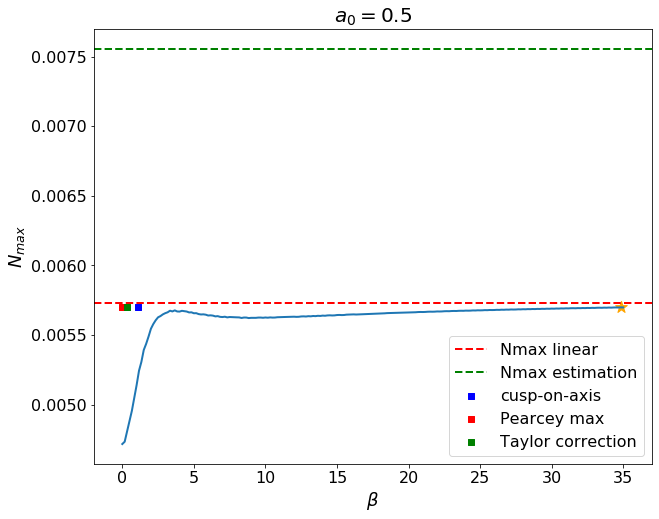

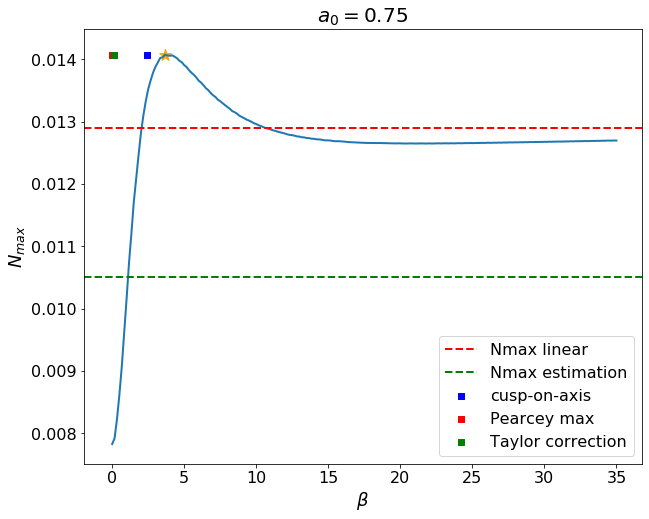

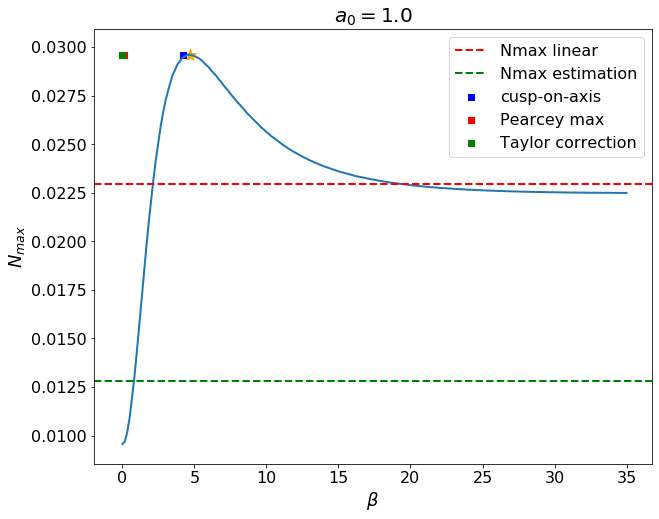

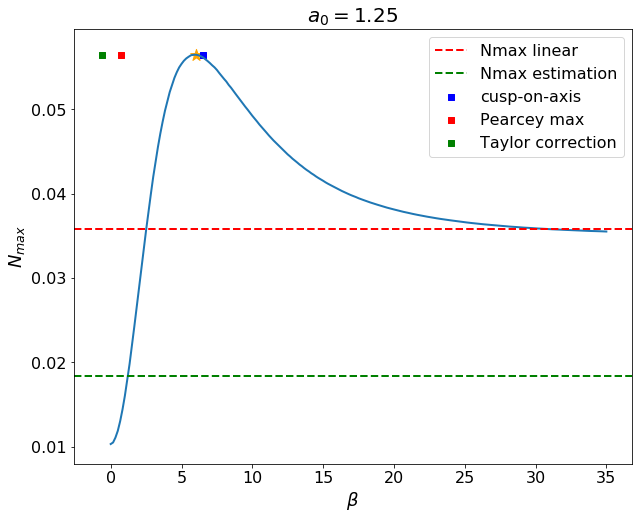

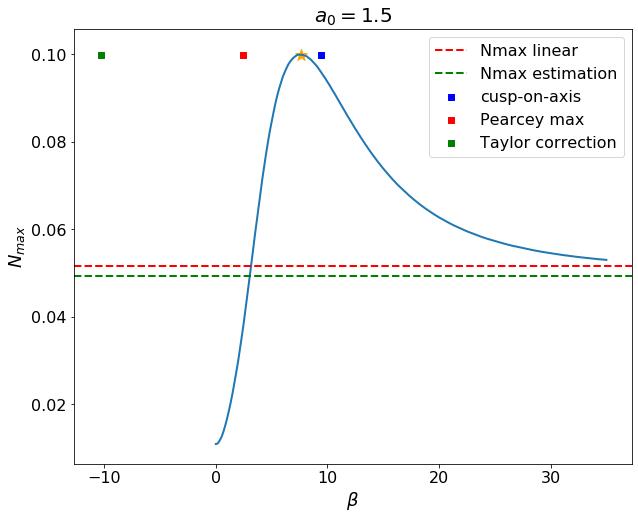

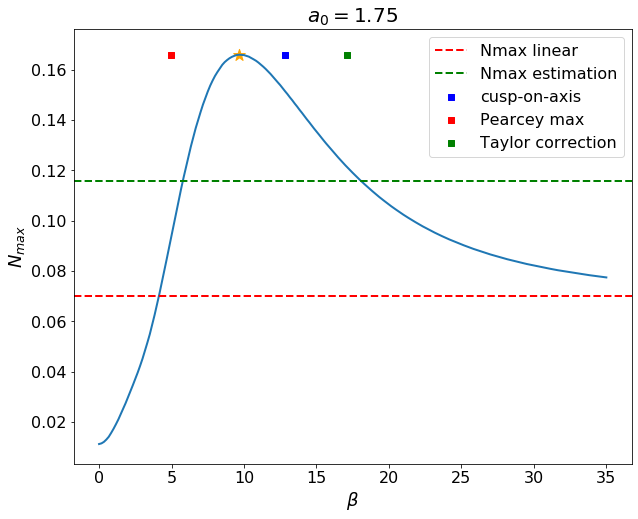

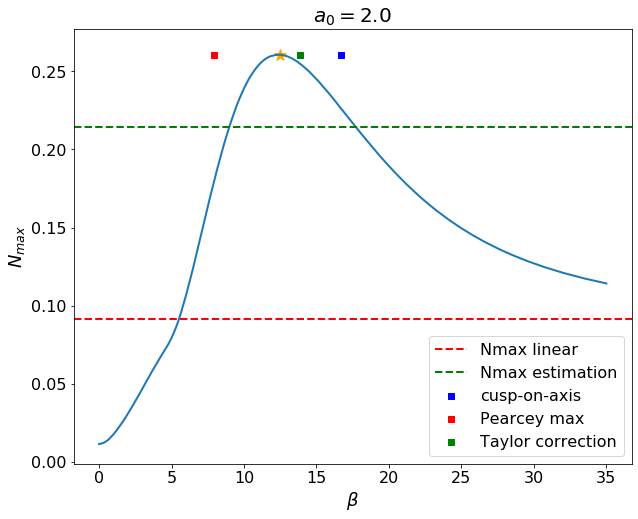

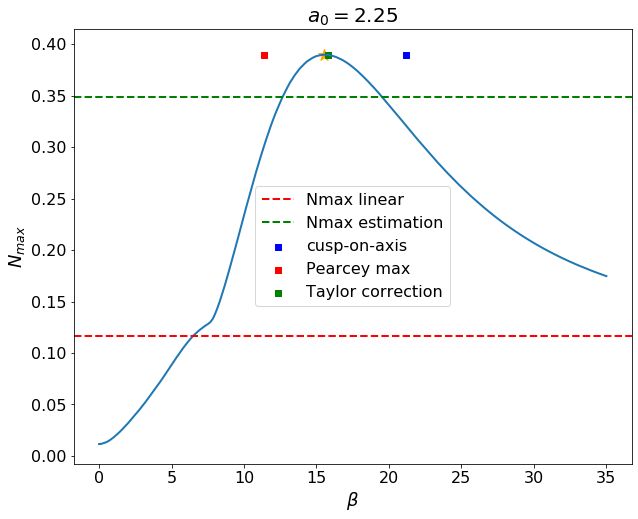

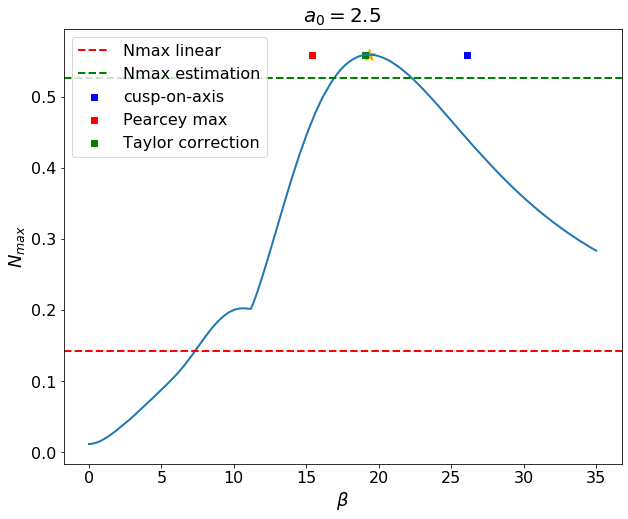

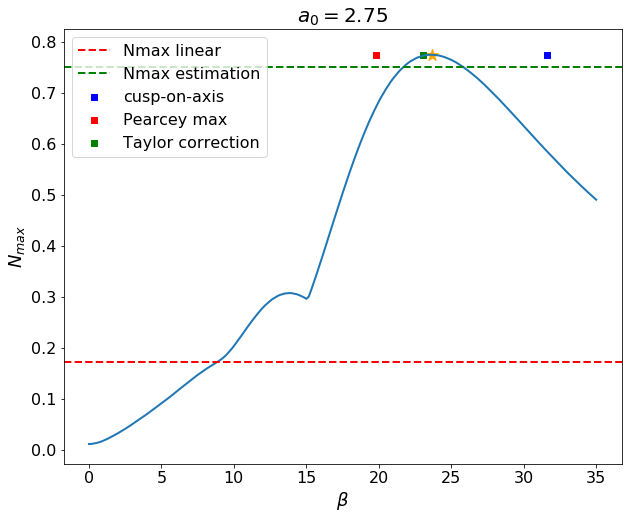

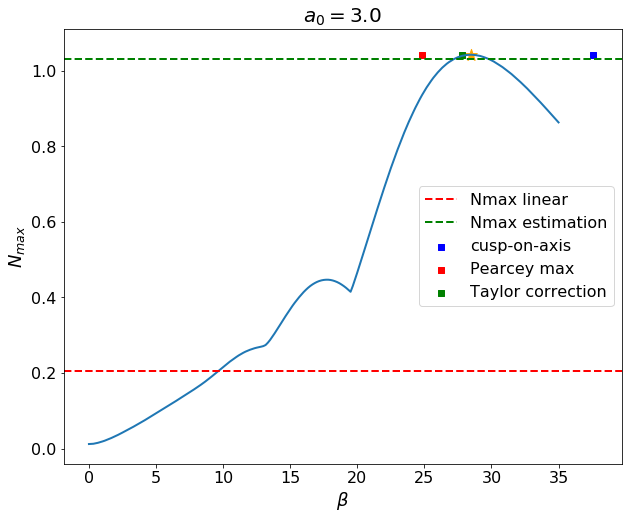

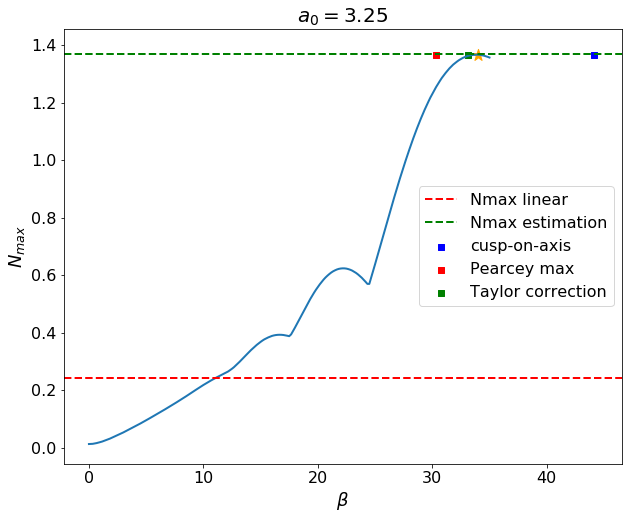

In [26]:
# Plot N_max(beta) + linear_reference + spectrum_estimate for a range of a0
n_a0 = a0_arr_tau_2.shape[0]
for idx in range(0, n_a0, 2):
    fig, ax = plt.subplots(figsize=(10,8))
    plt.plot(beta_arr_tau_2, N_max_beta_a0_tau_2[:,idx])
    y_pos = np.max(N_max_beta_a0_tau_2[:,idx])
    
    plt.scatter(beta_optimal_tau_2[idx], y_pos, color='orange', marker='*', s=150)
    plt.scatter(beta_cusp[idx], y_pos, color='blue', marker='s', label='cusp-on-axis')
    plt.scatter(beta_Pe[idx], y_pos, color='red', marker='s', label='Pearcey max')
    plt.scatter(beta_Taylor[idx], y_pos, color='green', marker='s', label='Taylor correction')
    
    ax.axhline(Nmax_linear[idx], linestyle='--', color='red', label='Nmax linear')
    ax.axhline(Nmax_estimation[idx], linestyle='--', color='green', label='Nmax estimation')
    
    plt.xlabel('$\\beta$', fontsize=18)
    plt.ylabel('$N_{max}$', fontsize=18)
    plt.title('$a_0 = {}$'.format(a0_arr_tau_2[idx]), fontsize=20)
    plt.legend(loc='best', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

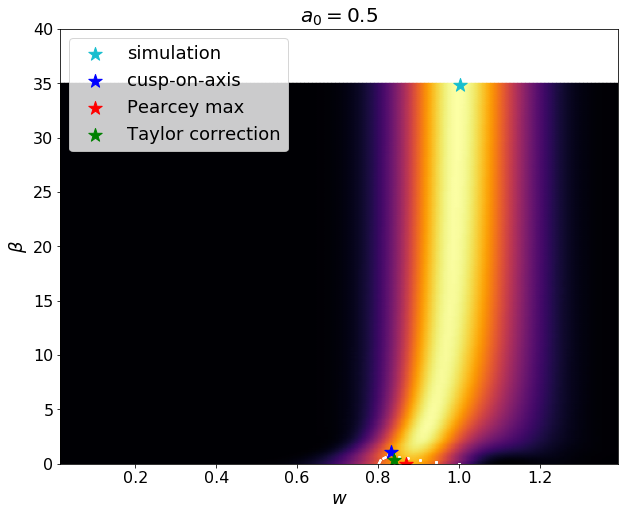

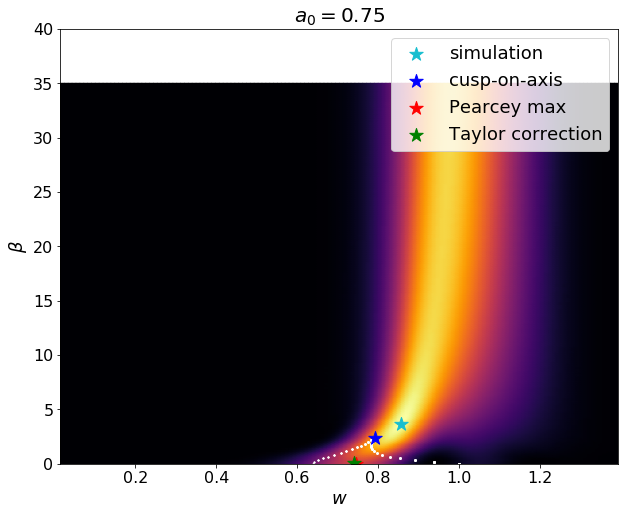

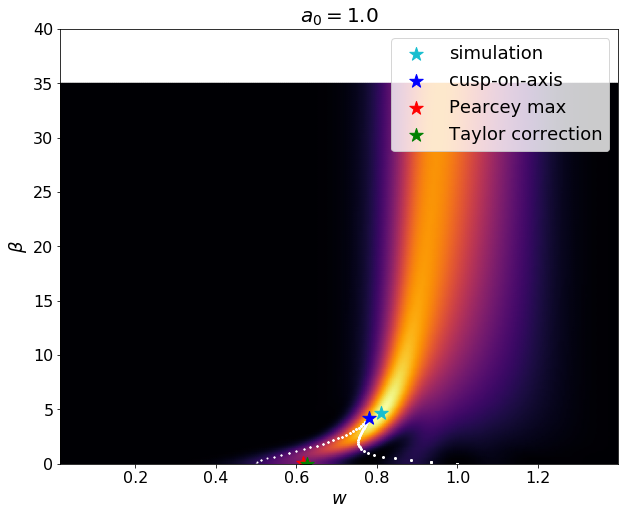

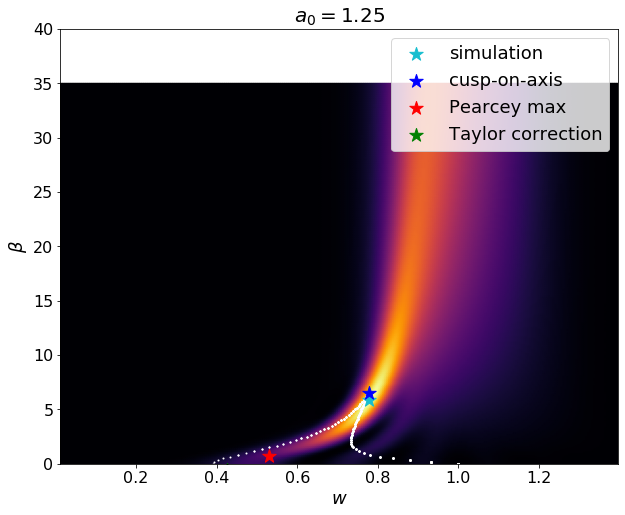

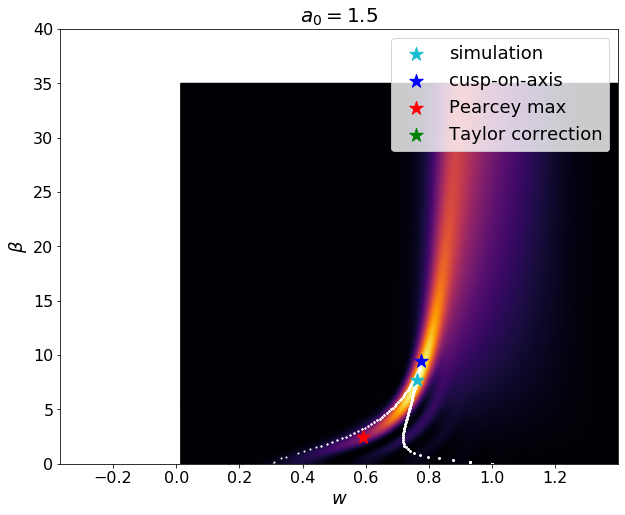

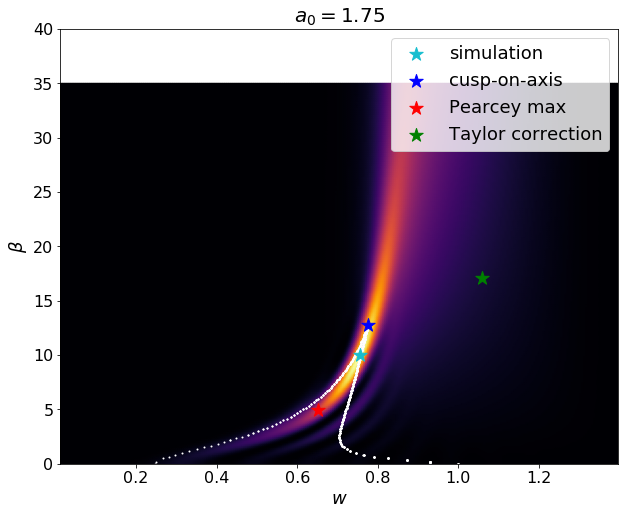

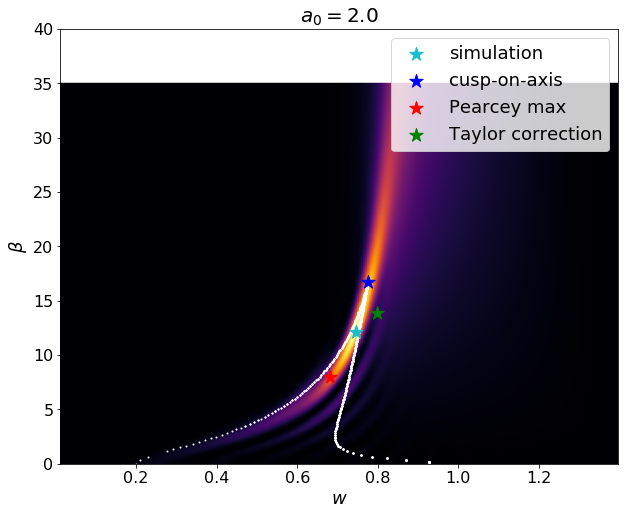

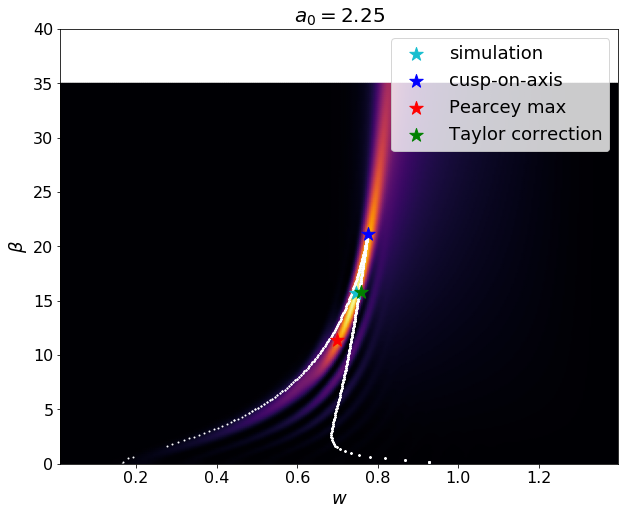

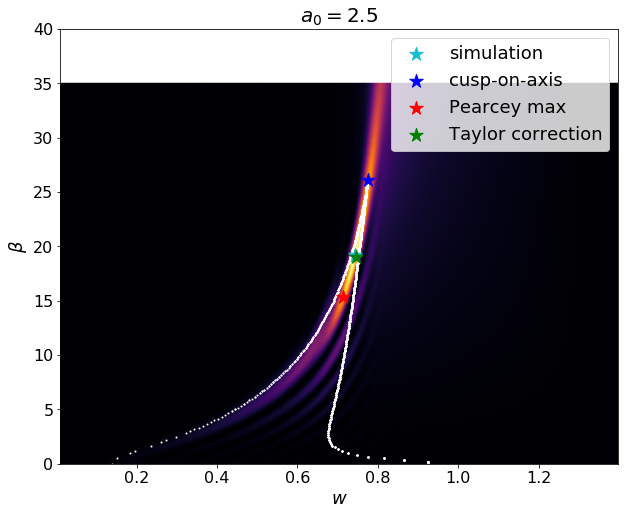

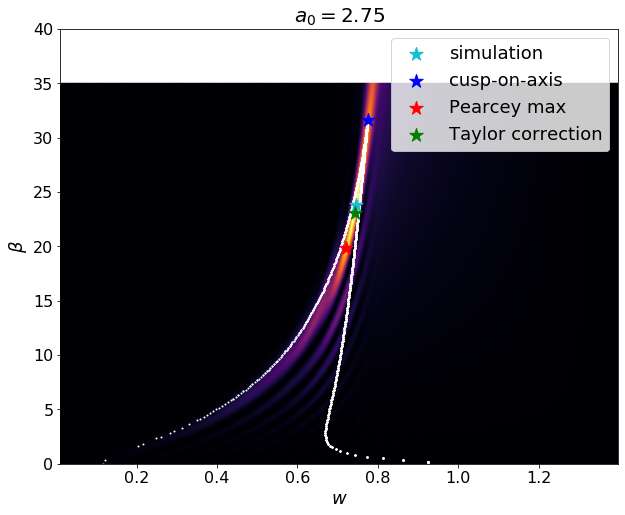

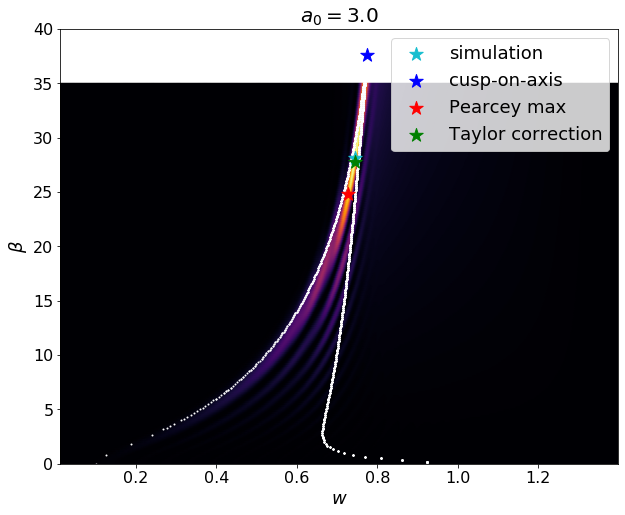

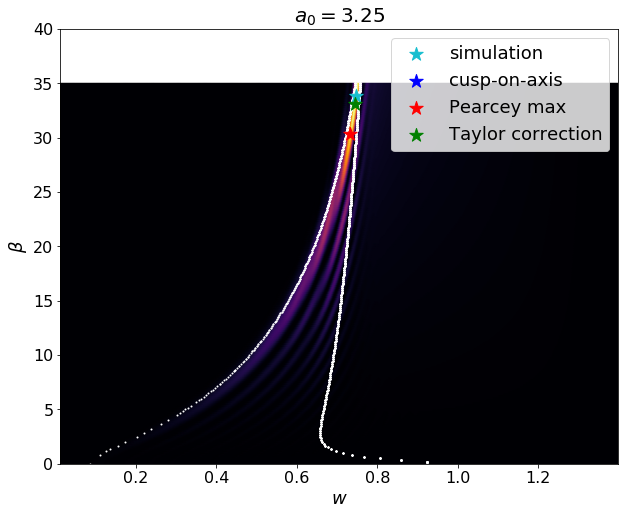

In [13]:
# For a range of a0 values plot folds+cusp plots in (beta, w)
tau = 2*np.pi

n_a0 = a0_arr_tau_2.shape[0]
for idx in range(0, n_a0, 2):
    idx_beta, idx_w = np.where(N_ph_a0_list_tau_2[idx] == N_ph_a0_list_tau_2[idx].max())
    beta_fold, w_fold = calculate_fold_w_beta(beta_arr_tau_2, a0_arr_tau_2[idx],
                                              tau, eps=3e-2)
    
    fig, ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(w_a0_list_tau_2[idx], beta_arr_tau_2, N_ph_a0_list_tau_2[idx],
                   cmap='inferno', shading='gouraud')
    
    plt.plot(w_fold, beta_fold, '.', color='white', markersize=2, zorder=1)
    
    plt.scatter(w_a0_list_tau_2[idx][idx_w[0]], beta_arr_tau_2[idx_beta[0]], color='tab:cyan', marker='*', s=200, zorder=2, label='simulation')
    plt.scatter(w_cusp[idx], beta_cusp[idx], color='blue', marker='*', s=200, zorder=2, label='cusp-on-axis')
    plt.scatter(w_Pe[idx], beta_Pe[idx], color='red', marker='*', s=200, zorder=2, label='Pearcey max')
    plt.scatter(w_Taylor[idx], beta_Taylor[idx], color='green', marker='*', s=200, zorder=2, label='Taylor correction')

    ax.set_ylim([0.,40.])
    plt.title('$a_0 = {}$'.format(a0_arr_tau_2[idx]), fontsize=20)
    plt.xlabel('$w$', fontsize=18)
    plt.ylabel('$\\beta$', fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(loc='best', fontsize=18)
    plt.show()

### $\tau = 4\pi$: data generation

In [14]:
mode = 'gauss_spectral'
polarization = 'circular'
tau = 4 * np.pi

# Define grid over beta
beta_start, beta_end = [0., 55.]
n_beta_unit = 4
beta_arr = np.linspace(beta_start, beta_end, int((beta_end-beta_start)*n_beta_unit+1))

# Define grid over a0
a0_start, a0_end = [0.5, 2.5]
n_a0_unit = 8
a0_arr = np.linspace(a0_start, a0_end, int((a0_end-a0_start)*n_a0_unit)+1)

# Frequency interval
wb = [.0, 1.4]

# Proceed with calculations
results = a0_beta_scan_classic(beta_arr, a0_arr, tau, wb=wb, mode=mode, polarization=polarization)
w_a0_list, N_ph_a0_list, N_max_a0_list, beta_optimal = results

i = 0, Calculation is finished!
i = 1, Calculation is finished!
i = 2, Calculation is finished!
i = 3, Calculation is finished!
i = 4, Calculation is finished!
i = 5, Calculation is finished!
i = 6, Calculation is finished!
i = 7, Calculation is finished!
i = 8, Calculation is finished!
i = 9, Calculation is finished!
i = 10, Calculation is finished!
i = 11, Calculation is finished!
i = 12, Calculation is finished!
i = 13, Calculation is finished!
i = 14, Calculation is finished!
i = 15, Calculation is finished!
i = 16, Calculation is finished!


In [14]:
folder = 'data/simulation/tau_4'

In [16]:
# Transforming and saving the data
N_max_beta_a0 = transform_N_ph_list_to_arr(N_ph_a0_list)
w_a0_list_interp, N_ph_a0_list_interp = interpolate_spectra_for_a0_arr(w_a0_list, N_ph_a0_list, a0_arr)

save_data_fixed_tau(w_a0_list_interp, N_ph_a0_list_interp, beta_arr, a0_arr, N_max_beta_a0,
                    folder=folder)

Saving is finished


In [15]:
# Loading data
data = load_data_fixed_tau(folder=folder)
w_a0_list_tau_4, N_ph_a0_list_tau_4 = data[:2]
beta_arr_tau_4, a0_arr_tau_4, N_max_beta_a0_tau_4, beta_optimal_tau_4 = data[2:]

In [29]:
# Generate analytics
tau = 4 * np.pi

beta_start, beta_end = [0., 80.]
n_beta = 50
beta_arr = np.linspace(beta_start, beta_end, int((beta_end-beta_start)*n_beta+1))

a0_start, a0_end = [0.5, 2.5]
n_a0 = 40
a0_arr = np.linspace(a0_start, a0_end, int((a0_end - a0_start)*n_a0 + 1))

# Solve cusp-on-axis equation and Pearcey maximum equations
beta_cusp, err_cusp = solve_cusp_equation_for_a0_arr(beta_arr, a0_arr, tau)
beta_Pe, w_Pe, err_Pe = solve_Pearcey_max_equation_for_a0_arr(beta_arr, a0_arr, tau)

# Calculate Taylor correction
beta_Taylor, w_Taylor = calculate_Taylor_correction_for_a0_arr(beta_Pe, w_Pe, a0_arr, tau)

In [16]:
folder = 'data/analytics/tau_4'

In [31]:
save_analytics_fixed_tau(beta_arr, a0_arr, beta_cusp, beta_Pe, w_Pe,
                         beta_Taylor, w_Taylor, folder)

Saving is finished


In [17]:
data = load_analytics_fixed_tau(folder)
beta_arr_th_tau_4, a0_arr_th_tau_4, beta_cusp_tau_4 = data[0], data[1], data[2]
beta_Pe_tau_4, w_Pe_tau_4 = data[3], data[4]
beta_Taylor_tau_4, w_Taylor_tau_4 = data[5], data[6]

### $\tau = 4\pi$: plots

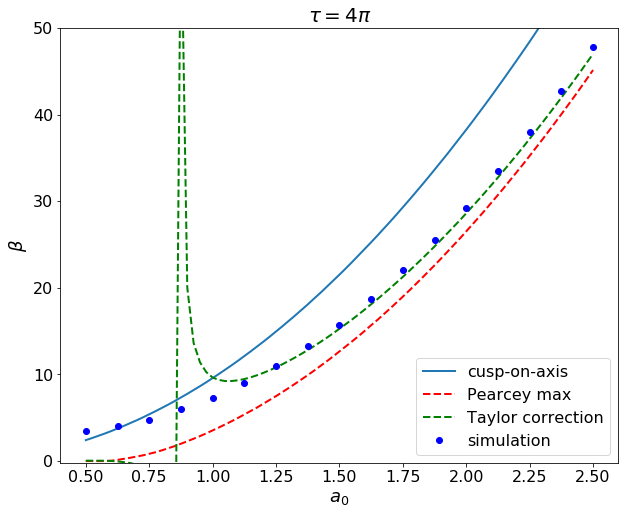

In [18]:
# Plot optimal beta(a0) for simulation, cusp-on-axis, Pearcey max and Taylor
# correction to Pearcey

fig, ax = plt.subplots(figsize=(10,8))

plt.plot(a0_arr_th_tau_4, beta_cusp_tau_4, color='tab:blue', label='cusp-on-axis')
plt.plot(a0_arr_th_tau_4, beta_Pe_tau_4, '--', color='red', label='Pearcey max')
plt.plot(a0_arr_th_tau_4, beta_Taylor_tau_4, '--', color='green', label='Taylor correction')

plt.plot(a0_arr_tau_4, beta_optimal_tau_4, 'o', color='blue', label='simulation')

ax.set_ylim([-0.2,50])
plt.title('$\\tau = 4\pi$', fontsize=20)
plt.xlabel('$a_0$', fontsize=18)
plt.ylabel('$\\beta$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.show()

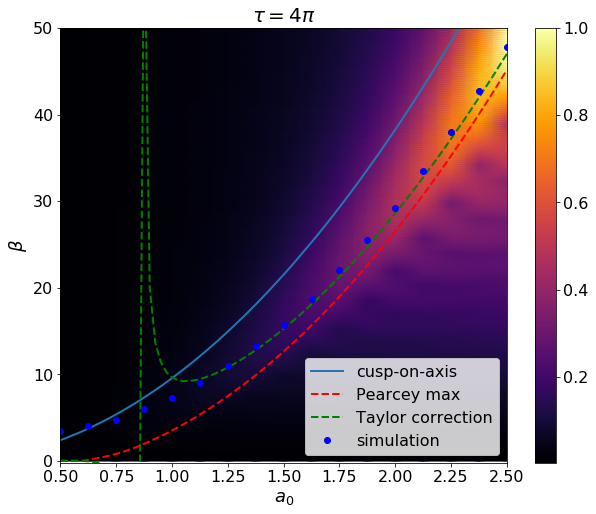

In [19]:
# The same plot but with N_ph_max as color background

fig, ax = plt.subplots(figsize=(10,8))

plt.pcolormesh(a0_arr_tau_4, beta_arr_tau_4, N_max_beta_a0_tau_4/N_max_beta_a0_tau_4.max(), cmap='inferno',
              shading='gouraud')
plt.colorbar()

plt.plot(a0_arr_th_tau_4, beta_cusp_tau_4, color='tab:blue', label='cusp-on-axis')
plt.plot(a0_arr_th_tau_4, beta_Pe_tau_4, '--', color='red', label='Pearcey max')
plt.plot(a0_arr_th_tau_4, beta_Taylor_tau_4, '--', color='green', label='Taylor correction')

plt.plot(a0_arr_tau_4, beta_optimal_tau_4, 'o', color='blue', label='simulation')

ax.set_ylim([-0.2,50])
plt.title('$\\tau = 4\pi$', fontsize=20)
plt.xlabel('$a_0$', fontsize=18)
plt.ylabel('$\\beta$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.show()

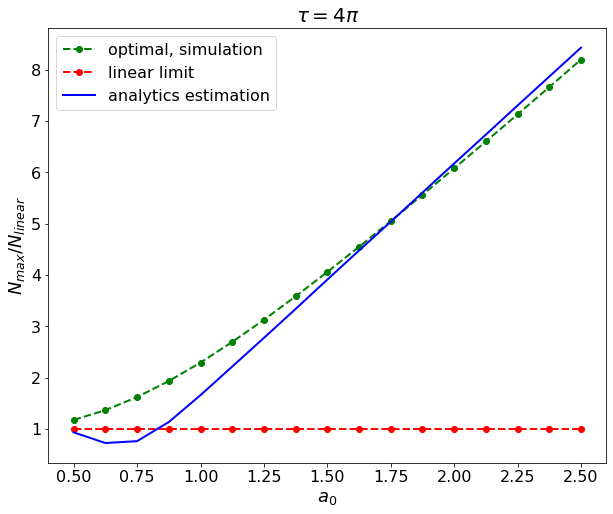

In [20]:
# Plot N_max(a0) for optimal beta parameters from numerics and analytics
tau = 4*np.pi

beta_cusp, _ = solve_cusp_equation_for_a0_arr(beta_arr_th_tau_4, a0_arr_tau_4, tau)
beta_Pe, w_Pe, _ = solve_Pearcey_max_equation_for_a0_arr(beta_arr_th_tau_4, a0_arr_tau_4, tau)
beta_Taylor, w_Taylor = calculate_Taylor_correction_for_a0_arr(beta_Pe, w_Pe, a0_arr_tau_4, tau)

tau_eff_cusp = tau * np.sqrt(1 + beta_cusp**2)
w_cusp = 1 - np.sqrt(2)*beta_cusp/tau_eff_cusp

data = collect_Nmax_arrays(a0_arr_tau_4, tau, beta_Pe, w_Pe, beta_optimal_tau_4, 
                           beta_arr_tau_4, N_max_beta_a0_tau_4)
Nmax_linear, Nmax_optimal, Nmax_estimation = data
Nmax_linear_norm = Nmax_linear / Nmax_linear
Nmax_optimal_norm = Nmax_optimal / Nmax_linear
Nmax_estimation_norm = Nmax_estimation / Nmax_linear


fig, ax = plt.subplots(figsize=(10,8))
plt.plot(a0_arr_tau_4, Nmax_optimal_norm, '--.', color='green', markersize=12, label='optimal, simulation')
plt.plot(a0_arr_tau_4, Nmax_linear_norm, '--.', color='red', markersize=12, label='linear limit')
plt.plot(a0_arr_tau_4, Nmax_estimation_norm, '-', color='blue', label='analytics estimation')
plt.title('$\\tau = 4\pi$', fontsize=20)
plt.xlabel('$a_0$', fontsize=18)
plt.ylabel('$N_{max}/N_{linear}$', fontsize=18)
plt.legend(loc='best', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

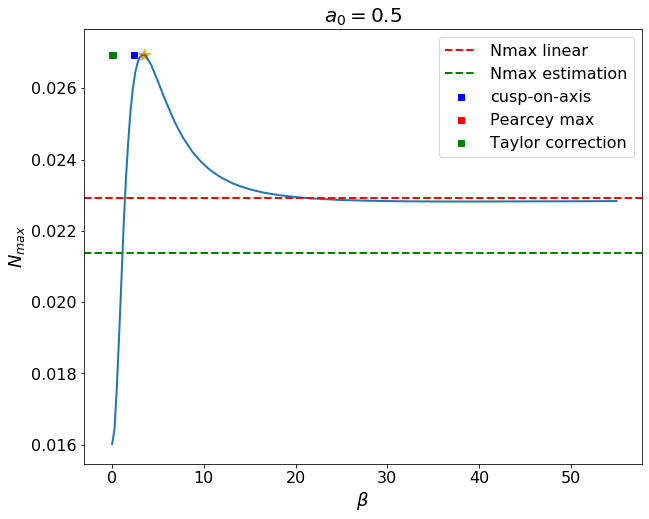

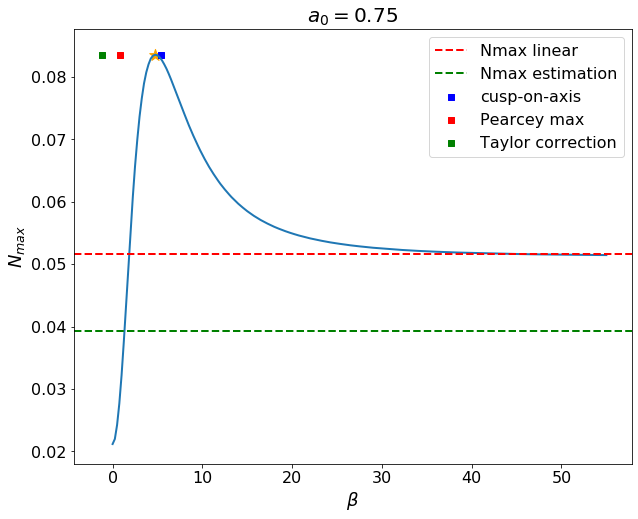

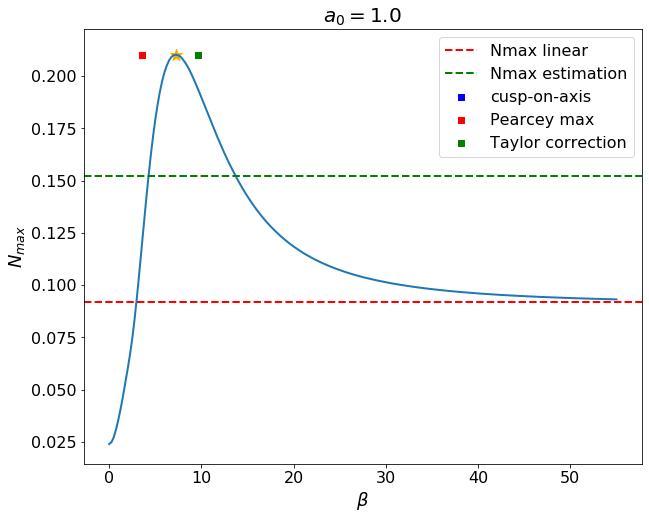

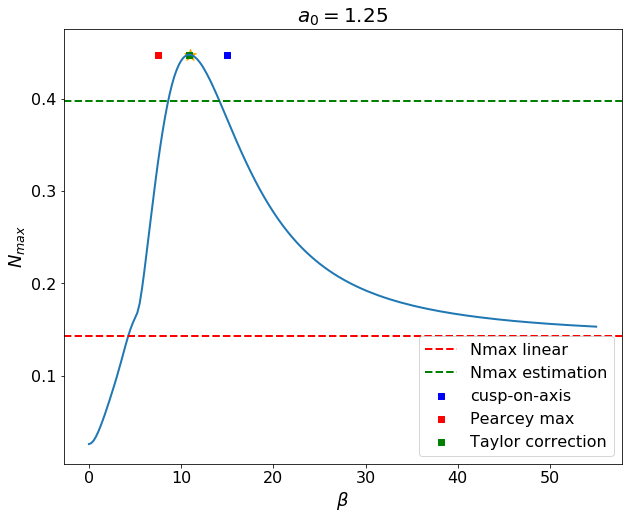

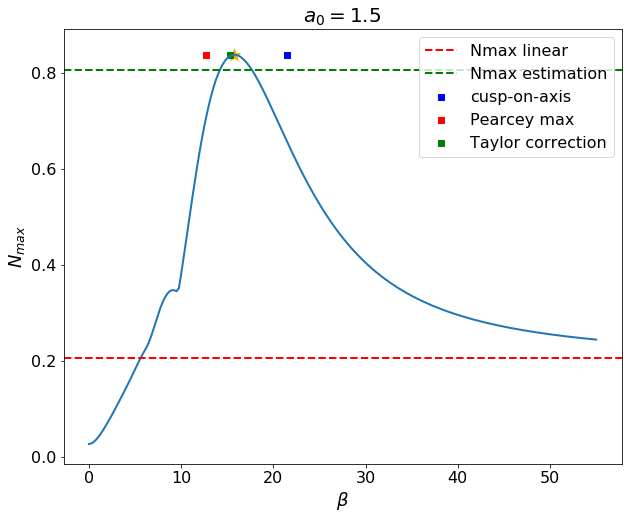

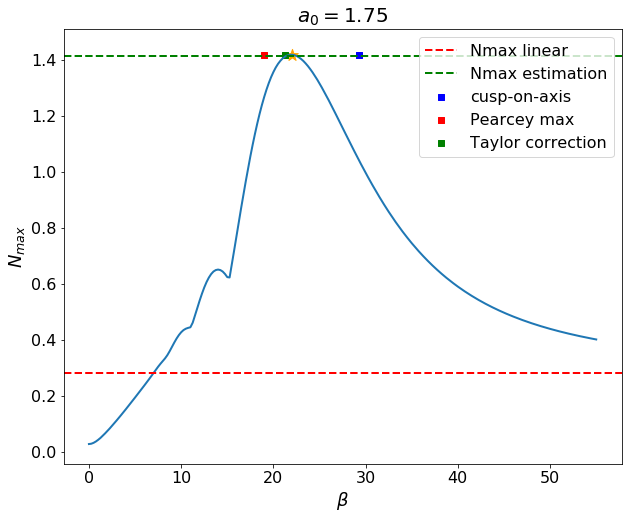

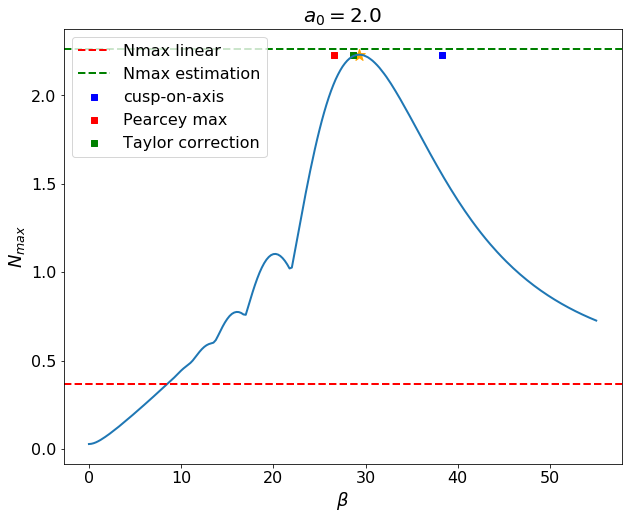

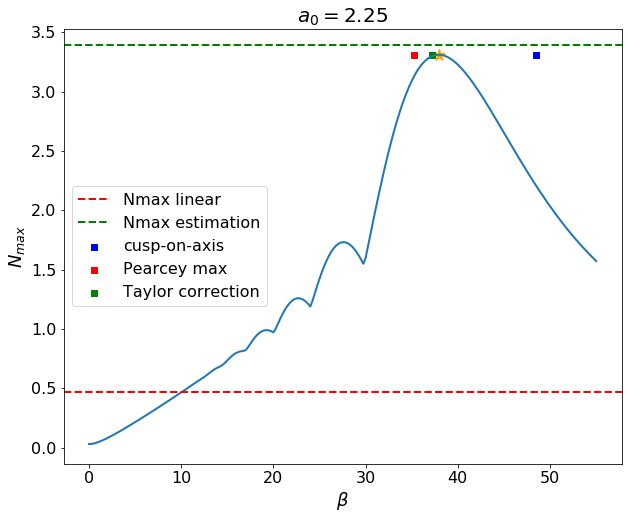

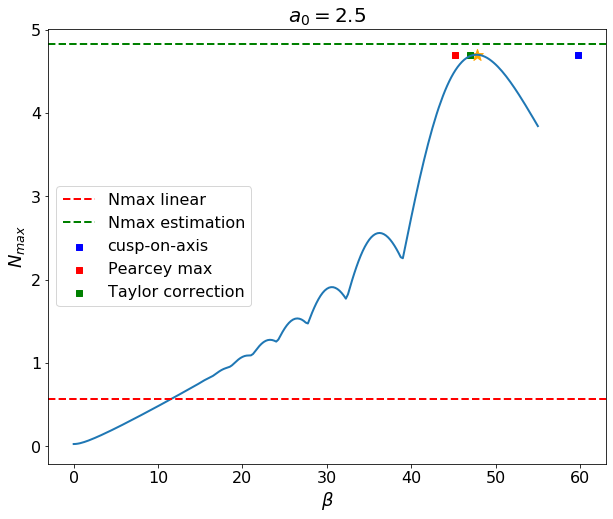

In [36]:
# Plot N_max(beta) + linear_reference + spectrum_estimate for a range of a0
n_a0 = a0_arr_tau_4.shape[0]
for idx in range(0, n_a0, 2):
    fig, ax = plt.subplots(figsize=(10,8))
    plt.plot(beta_arr_tau_4, N_max_beta_a0_tau_4[:,idx])
    y_pos = np.max(N_max_beta_a0_tau_4[:,idx])
    
    plt.scatter(beta_optimal_tau_4[idx], y_pos, color='orange', marker='*', s=150)
    plt.scatter(beta_cusp[idx], y_pos, color='blue', marker='s', label='cusp-on-axis')
    plt.scatter(beta_Pe[idx], y_pos, color='red', marker='s', label='Pearcey max')
    plt.scatter(beta_Taylor[idx], y_pos, color='green', marker='s', label='Taylor correction')
    
    ax.axhline(Nmax_linear[idx], linestyle='--', color='red', label='Nmax linear')
    ax.axhline(Nmax_estimation[idx], linestyle='--', color='green', label='Nmax estimation')
    
    plt.xlabel('$\\beta$', fontsize=18)
    plt.ylabel('$N_{max}$', fontsize=18)
    plt.title('$a_0 = {}$'.format(a0_arr_tau_2[idx]), fontsize=20)
    plt.legend(loc='best', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

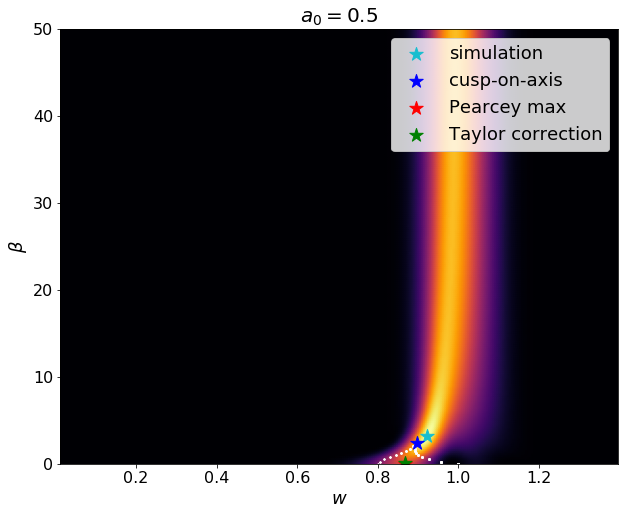

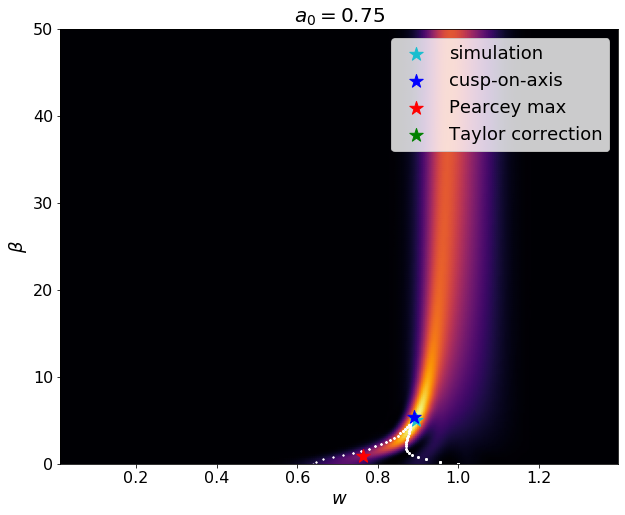

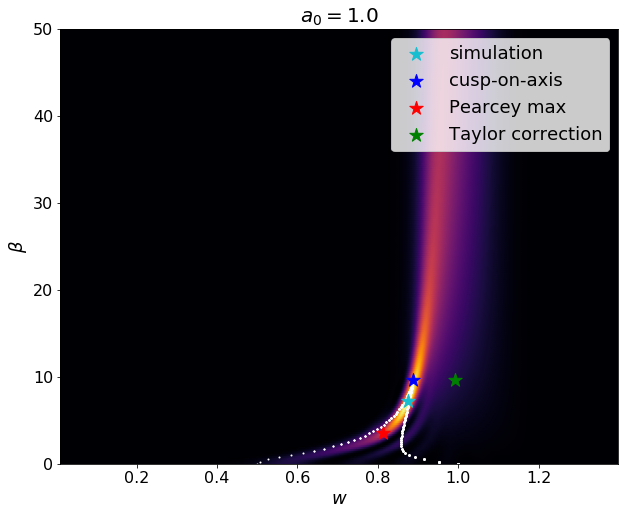

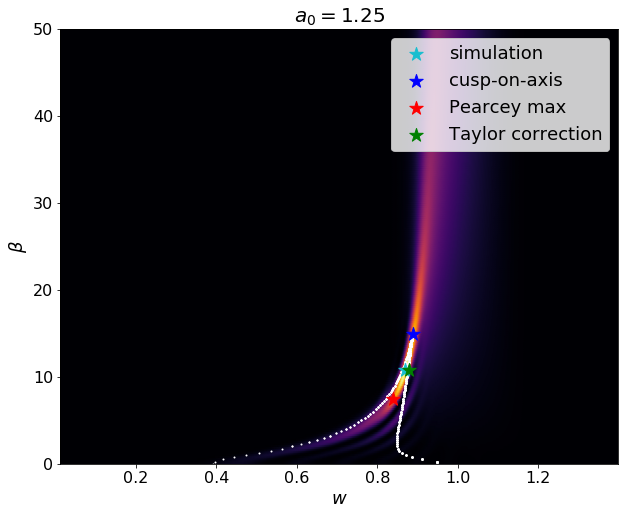

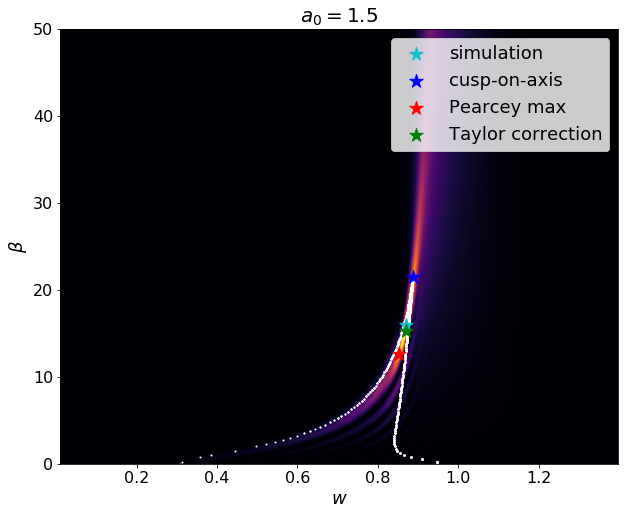

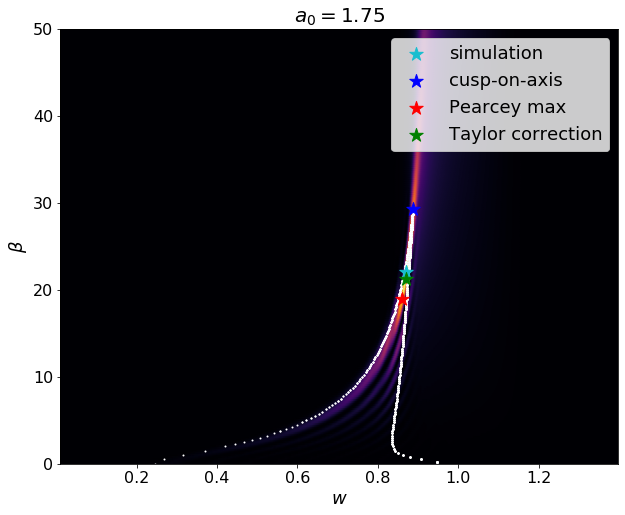

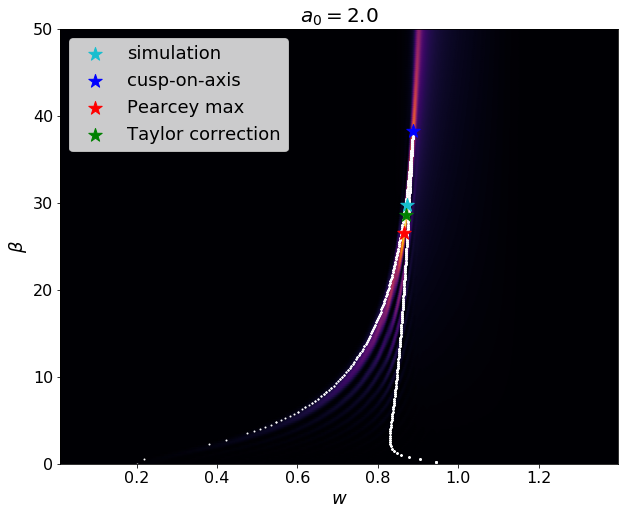

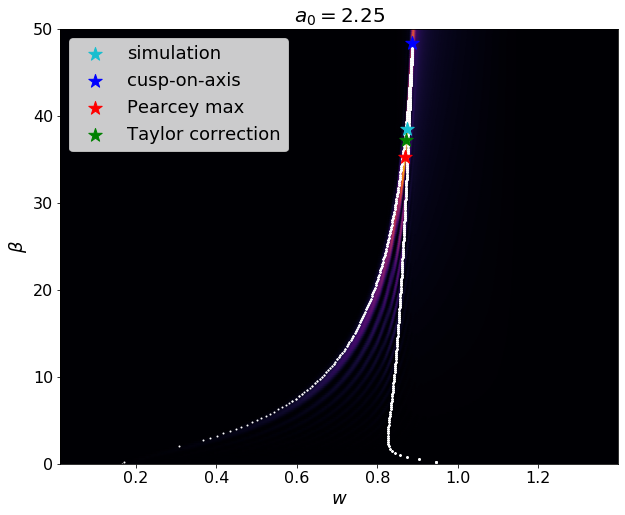

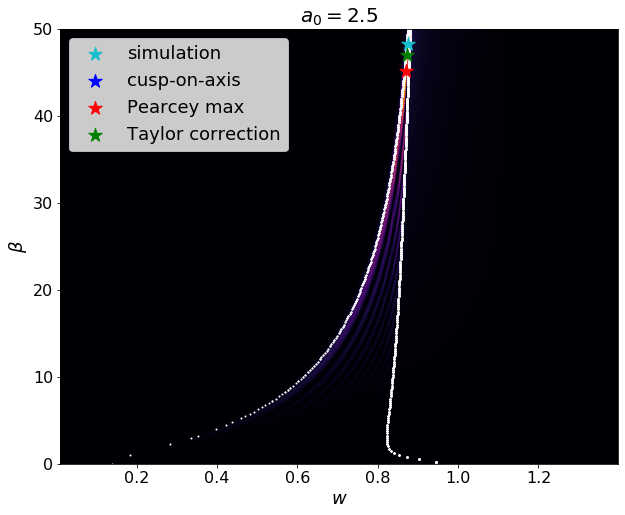

In [21]:
# For a range of a0 values plot folds+cusp plots in (beta, w)
tau = 4*np.pi

n_a0 = a0_arr_tau_4.shape[0]
for idx in range(0, n_a0, 2):
    idx_beta, idx_w = np.where(N_ph_a0_list_tau_4[idx] == N_ph_a0_list_tau_4[idx].max())
    beta_fold, w_fold = calculate_fold_w_beta(beta_arr_tau_4, a0_arr_tau_4[idx],
                                              tau, eps=2e-2)
    
    fig, ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(w_a0_list_tau_4[idx], beta_arr_tau_4, N_ph_a0_list_tau_4[idx],
                   cmap='inferno', shading='gouraud')
    
    plt.plot(w_fold, beta_fold, '.', color='white', markersize=2, zorder=1)
    # for i,(phi, w) in enumerate(data):
    #     plt.plot(w, beta_arr[i]*np.ones_like(w), '.', color='white', markersize=2, zorder=1)
    plt.scatter(w_a0_list_tau_4[idx][idx_w[0]], beta_arr_tau_4[idx_beta[0]], color='tab:cyan', marker='*', s=200, zorder=2, label='simulation')
    plt.scatter(w_cusp[idx], beta_cusp[idx], color='blue', marker='*', s=200, zorder=2, label='cusp-on-axis')
    plt.scatter(w_Pe[idx], beta_Pe[idx], color='red', marker='*', s=200, zorder=2, label='Pearcey max')
    plt.scatter(w_Taylor[idx], beta_Taylor[idx], color='green', marker='*', s=200, zorder=2, label='Taylor correction')

    ax.set_ylim([0.,50.])
    plt.title('$a_0 = {}$'.format(a0_arr_tau_4[idx]), fontsize=20)
    plt.xlabel('$w$', fontsize=18)
    plt.ylabel('$\\beta$', fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(loc='best', fontsize=18)
    plt.show()

### $\tau = 6\pi$: data generation

In [37]:
mode = 'gauss_spectral'
polarization = 'circular'
tau = 6 * np.pi

# Define grid over beta
beta_start, beta_end = [0., 63.]
n_beta_unit = 4
beta_arr = np.linspace(beta_start, beta_end, int((beta_end-beta_start)*n_beta_unit+1))

# Define grid over a0
a0_start, a0_end = [0.5, 2.25]
n_a0_unit = 8
a0_arr = np.linspace(a0_start, a0_end, int((a0_end-a0_start)*n_a0_unit)+1)

# Frequency interval
wb = [.0, 1.4]

# Proceed with calculations
results = a0_beta_scan_classic(beta_arr, a0_arr, tau, wb=wb, mode=mode, polarization=polarization)
w_a0_list, N_ph_a0_list, N_max_a0_list, beta_optimal = results

i = 0, Calculation is finished!
i = 1, Calculation is finished!
i = 2, Calculation is finished!
i = 3, Calculation is finished!
i = 4, Calculation is finished!
i = 5, Calculation is finished!
i = 6, Calculation is finished!
i = 7, Calculation is finished!
i = 8, Calculation is finished!
i = 9, Calculation is finished!
i = 10, Calculation is finished!
i = 11, Calculation is finished!
i = 12, Calculation is finished!
i = 13, Calculation is finished!
i = 14, Calculation is finished!


In [22]:
folder = 'data/simulation/tau_6'

In [39]:
# Transforming and saving the data
N_max_beta_a0 = transform_N_ph_list_to_arr(N_ph_a0_list)
w_a0_list_interp, N_ph_a0_list_interp = interpolate_spectra_for_a0_arr(w_a0_list, N_ph_a0_list, a0_arr)

save_data_fixed_tau(w_a0_list_interp, N_ph_a0_list_interp, beta_arr, a0_arr, N_max_beta_a0,
                    beta_optimal, folder=folder)

Saving is finished


In [23]:
# Loading data
data = load_data_fixed_tau(folder=folder)
w_a0_list_tau_6, N_ph_a0_list_tau_6 = data[:2]
beta_arr_tau_6, a0_arr_tau_6, N_max_beta_a0_tau_6, beta_optimal_tau_6 = data[2:]

In [41]:
# Generate analytics
tau = 6 * np.pi

beta_start, beta_end = [0., 80.]
n_beta = 50
beta_arr = np.linspace(beta_start, beta_end, int((beta_end-beta_start)*n_beta+1))

a0_start, a0_end = [0.5, 2.5]
n_a0 = 40
a0_arr = np.linspace(a0_start, a0_end, int((a0_end - a0_start)*n_a0 + 1))

# Solve cusp-on-axis equation and Pearcey maximum equations
beta_cusp, err_cusp = solve_cusp_equation_for_a0_arr(beta_arr, a0_arr, tau)
beta_Pe, w_Pe, err_Pe = solve_Pearcey_max_equation_for_a0_arr(beta_arr, a0_arr, tau)

# Calculate Taylor correction
beta_Taylor, w_Taylor = calculate_Taylor_correction_for_a0_arr(beta_Pe, w_Pe, a0_arr, tau)

In [24]:
folder = 'data/analytics/tau_6'

In [43]:
save_analytics_fixed_tau(beta_arr, a0_arr, beta_cusp, beta_Pe, w_Pe,
                         beta_Taylor, w_Taylor, folder)

Saving is finished


In [25]:
data = load_analytics_fixed_tau(folder)
beta_arr_th_tau_6, a0_arr_th_tau_6, beta_cusp_tau_6 = data[0], data[1], data[2]
beta_Pe_tau_6, w_Pe_tau_6 = data[3], data[4]
beta_Taylor_tau_6, w_Taylor_tau_6 = data[5], data[6]

### $\tau = 6\pi$: plots

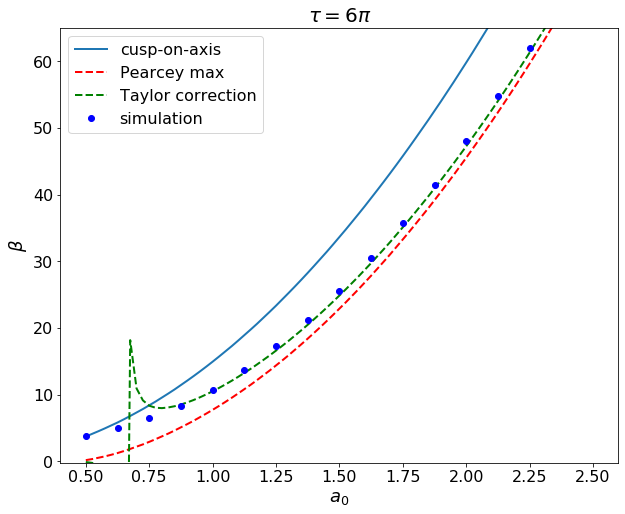

In [26]:
# Plot optimal beta(a0) for simulation, cusp-on-axis, Pearcey max and Taylor
# correction to Pearcey

fig, ax = plt.subplots(figsize=(10,8))

plt.plot(a0_arr_th_tau_6, beta_cusp_tau_6, color='tab:blue', label='cusp-on-axis')
plt.plot(a0_arr_th_tau_6, beta_Pe_tau_6, '--', color='red', label='Pearcey max')
plt.plot(a0_arr_th_tau_6, beta_Taylor_tau_6, '--', color='green', label='Taylor correction')

plt.plot(a0_arr_tau_6, beta_optimal_tau_6, 'o', color='blue', label='simulation')

ax.set_ylim([-0.2,65])
plt.title('$\\tau = 6\pi$', fontsize=20)
plt.xlabel('$a_0$', fontsize=18)
plt.ylabel('$\\beta$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.show()

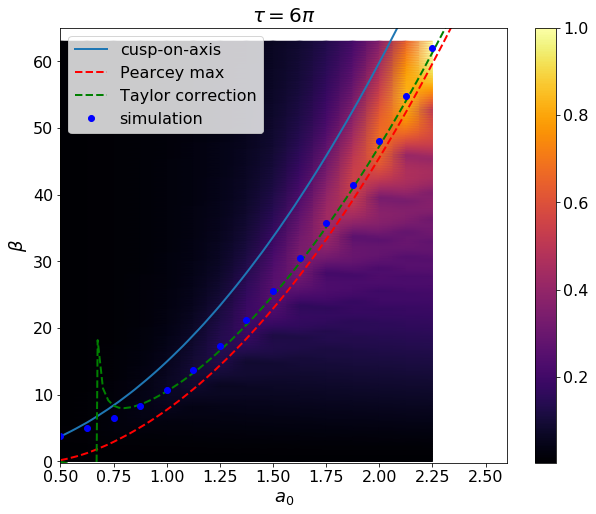

In [27]:
# The same plot but with N_ph_max as color background

fig, ax = plt.subplots(figsize=(10,8))

plt.pcolormesh(a0_arr_tau_6, beta_arr_tau_6, N_max_beta_a0_tau_6/N_max_beta_a0_tau_6.max(), cmap='inferno',
              shading='gouraud')
plt.colorbar()

plt.plot(a0_arr_th_tau_6, beta_cusp_tau_6, color='tab:blue', label='cusp-on-axis')
plt.plot(a0_arr_th_tau_6, beta_Pe_tau_6, '--', color='red', label='Pearcey max')
plt.plot(a0_arr_th_tau_6, beta_Taylor_tau_6, '--', color='green', label='Taylor correction')

plt.plot(a0_arr_tau_6, beta_optimal_tau_6, 'o', color='blue', label='simulation')

ax.set_ylim([-0.2,65])
plt.title('$\\tau = 6\pi$', fontsize=20)
plt.xlabel('$a_0$', fontsize=18)
plt.ylabel('$\\beta$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.show()

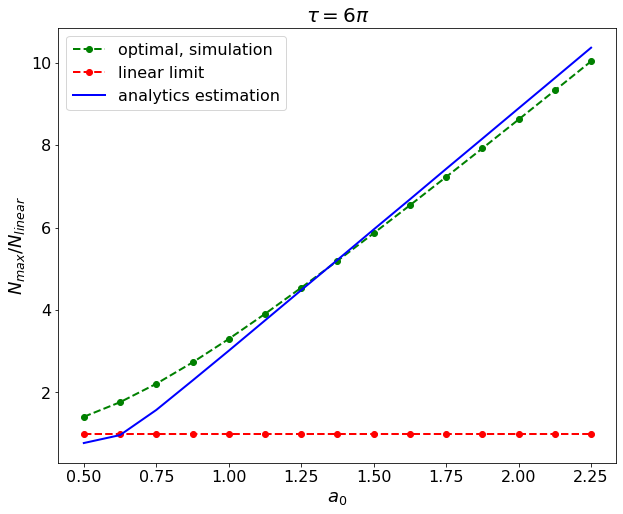

In [28]:
# Plot N_max(a0) for optimal beta parameters from numerics and analytics
tau = 6*np.pi

beta_cusp, _ = solve_cusp_equation_for_a0_arr(beta_arr_th_tau_6, a0_arr_tau_6, tau)
beta_Pe, w_Pe, _ = solve_Pearcey_max_equation_for_a0_arr(beta_arr_th_tau_6, a0_arr_tau_6, tau)
beta_Taylor, w_Taylor = calculate_Taylor_correction_for_a0_arr(beta_Pe, w_Pe, a0_arr_tau_6, tau)

tau_eff_cusp = tau * np.sqrt(1 + beta_cusp**2)
w_cusp = 1 - np.sqrt(2)*beta_cusp/tau_eff_cusp

data = collect_Nmax_arrays(a0_arr_tau_6, tau, beta_Pe, w_Pe, beta_optimal_tau_6, 
                           beta_arr_tau_6, N_max_beta_a0_tau_6)
Nmax_linear, Nmax_optimal, Nmax_estimation = data
Nmax_linear_norm = Nmax_linear / Nmax_linear
Nmax_optimal_norm = Nmax_optimal / Nmax_linear
Nmax_estimation_norm = Nmax_estimation / Nmax_linear


fig, ax = plt.subplots(figsize=(10,8))
plt.plot(a0_arr_tau_6, Nmax_optimal_norm, '--.', color='green', markersize=12, label='optimal, simulation')
plt.plot(a0_arr_tau_6, Nmax_linear_norm, '--.', color='red', markersize=12, label='linear limit')
plt.plot(a0_arr_tau_6, Nmax_estimation_norm, '-', color='blue', label='analytics estimation')
plt.title('$\\tau = 6\pi$', fontsize=20)
plt.xlabel('$a_0$', fontsize=18)
plt.ylabel('$N_{max}/N_{linear}$', fontsize=18)
plt.legend(loc='best', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

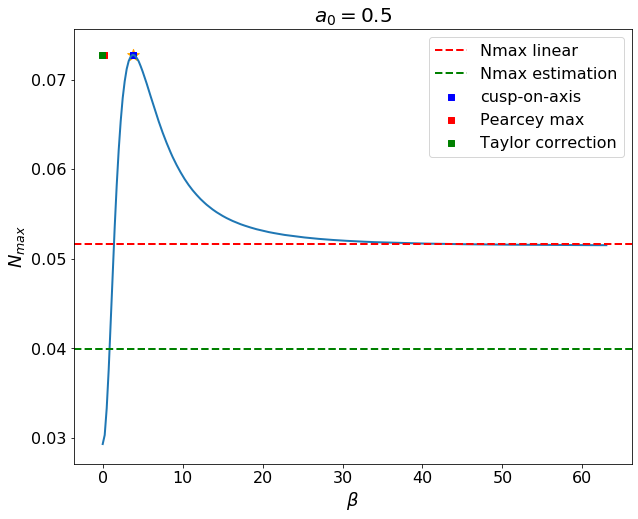

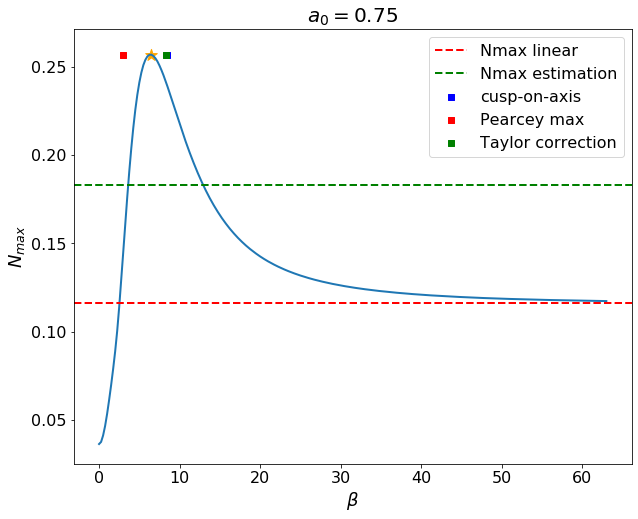

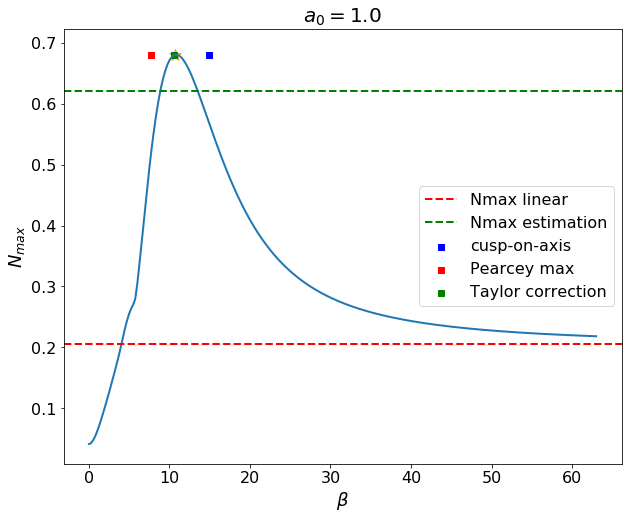

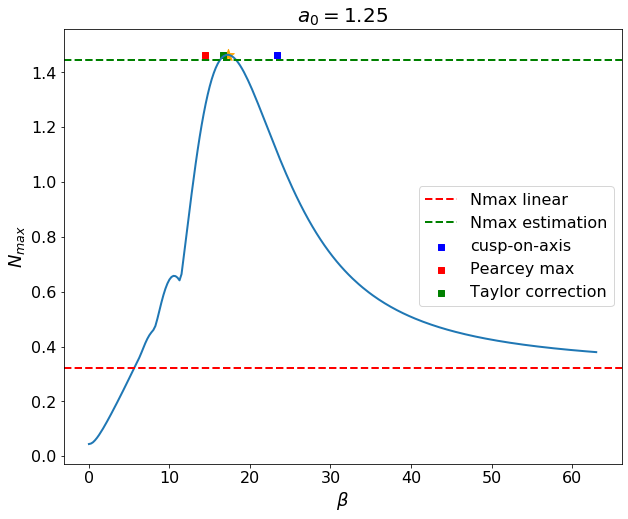

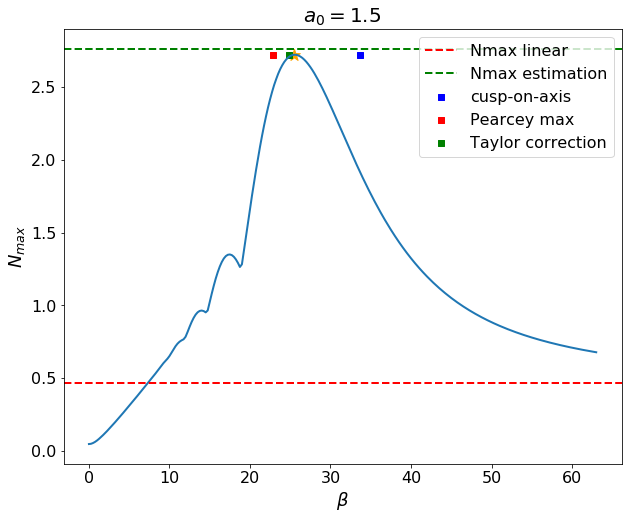

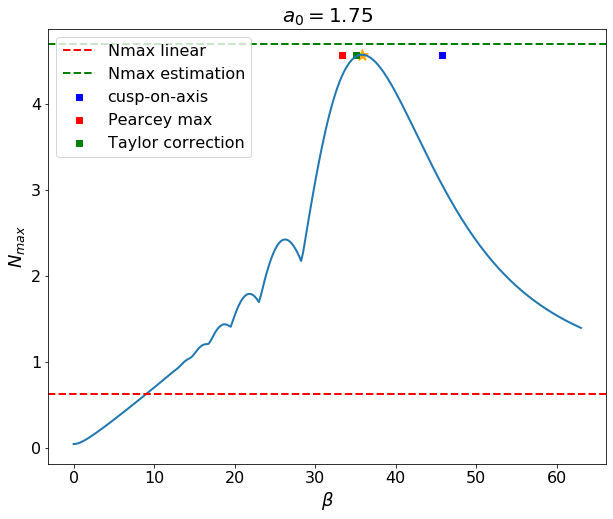

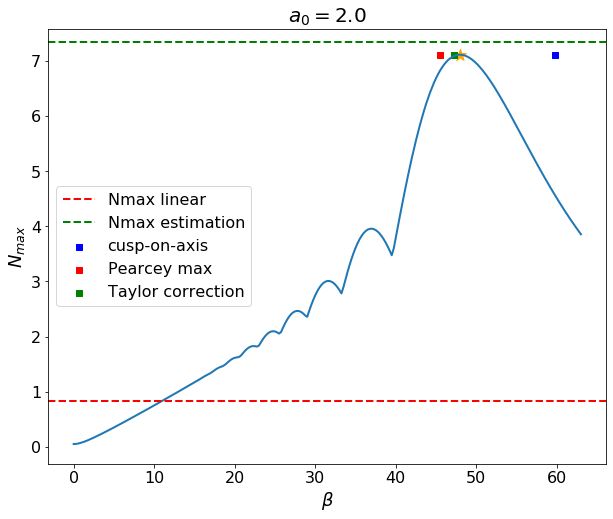

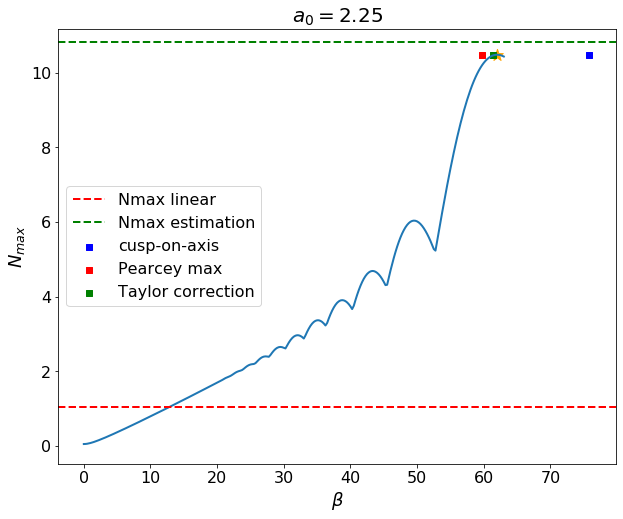

In [51]:
# Plot N_max(beta) + linear_reference + spectrum_estimate for a range of a0
n_a0 = a0_arr_tau_6.shape[0]
for idx in range(0, n_a0, 2):
    fig, ax = plt.subplots(figsize=(10,8))
    plt.plot(beta_arr_tau_6, N_max_beta_a0_tau_6[:,idx])
    y_pos = np.max(N_max_beta_a0_tau_6[:,idx])
    
    plt.scatter(beta_optimal_tau_6[idx], y_pos, color='orange', marker='*', s=150)
    plt.scatter(beta_cusp[idx], y_pos, color='blue', marker='s', label='cusp-on-axis')
    plt.scatter(beta_Pe[idx], y_pos, color='red', marker='s', label='Pearcey max')
    plt.scatter(beta_Taylor[idx], y_pos, color='green', marker='s', label='Taylor correction')
    
    ax.axhline(Nmax_linear[idx], linestyle='--', color='red', label='Nmax linear')
    ax.axhline(Nmax_estimation[idx], linestyle='--', color='green', label='Nmax estimation')
    
    plt.xlabel('$\\beta$', fontsize=18)
    plt.ylabel('$N_{max}$', fontsize=18)
    plt.title('$a_0 = {}$'.format(a0_arr_tau_2[idx]), fontsize=20)
    plt.legend(loc='best', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

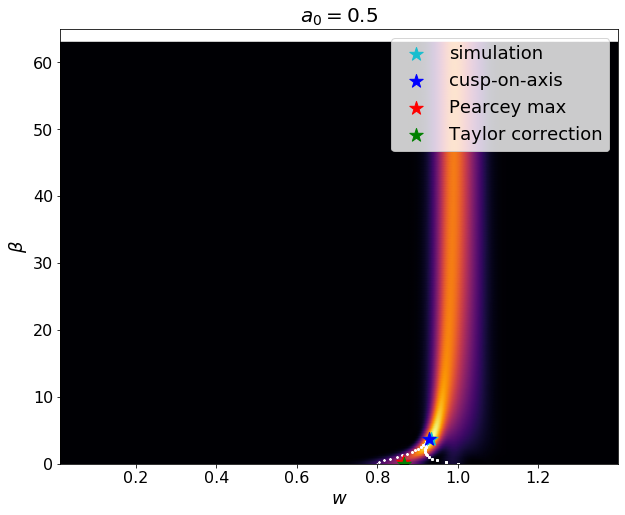

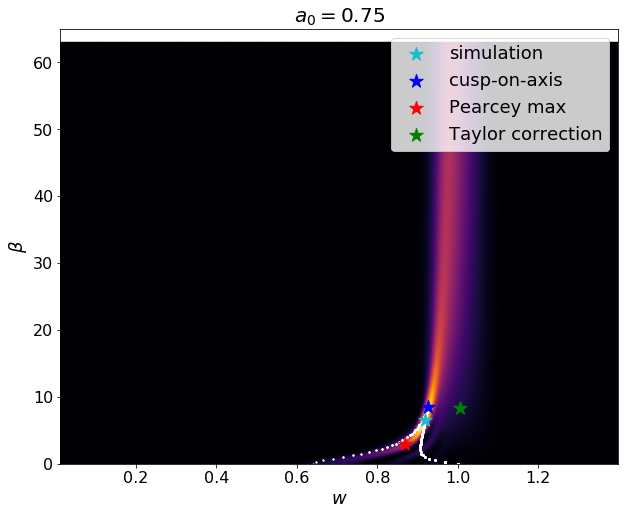

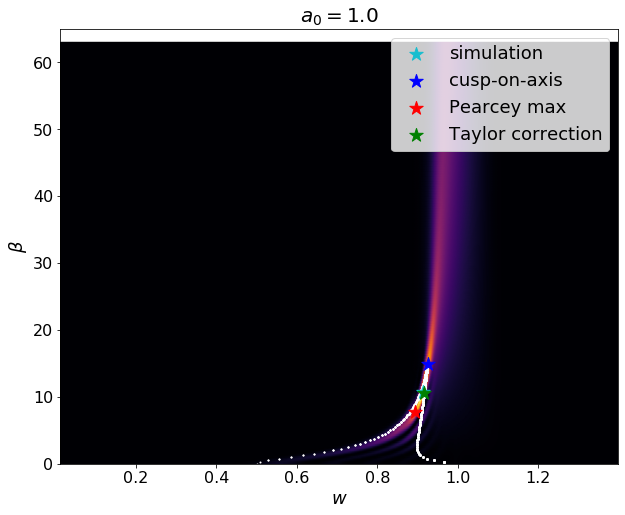

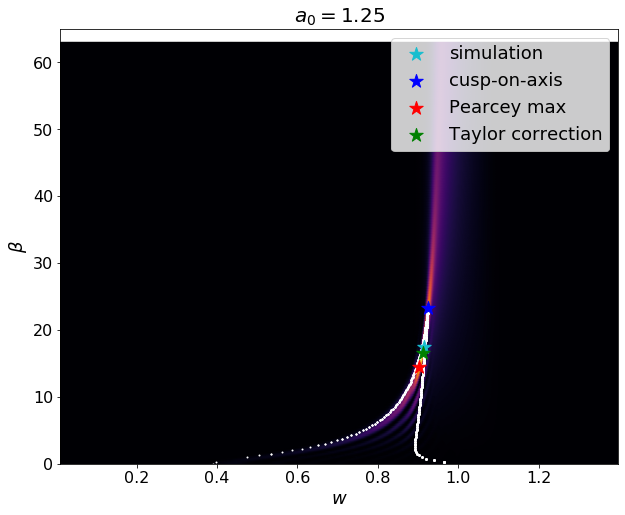

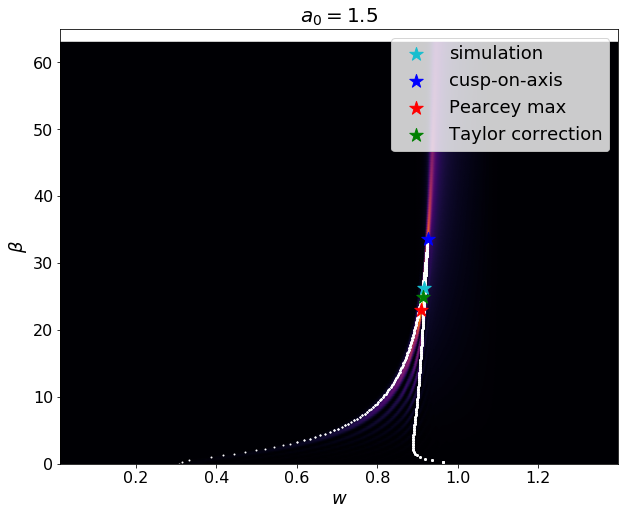

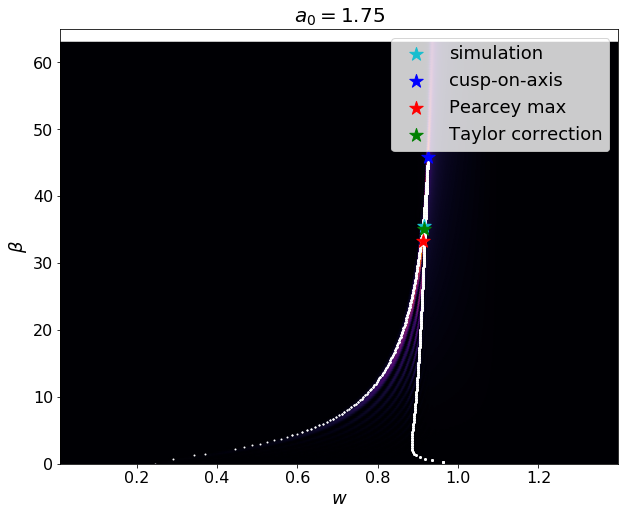

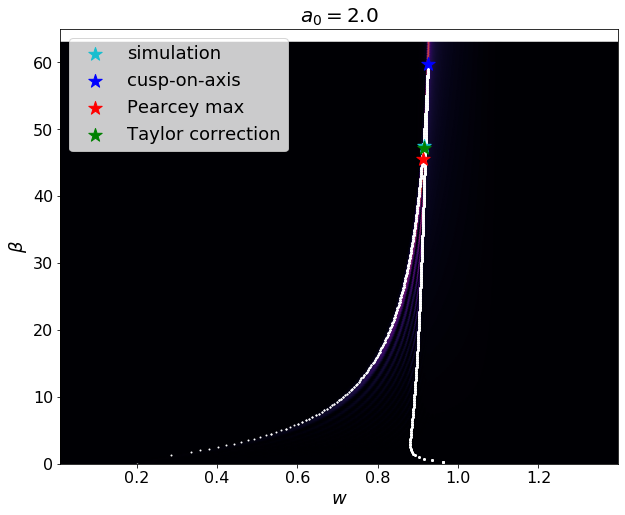

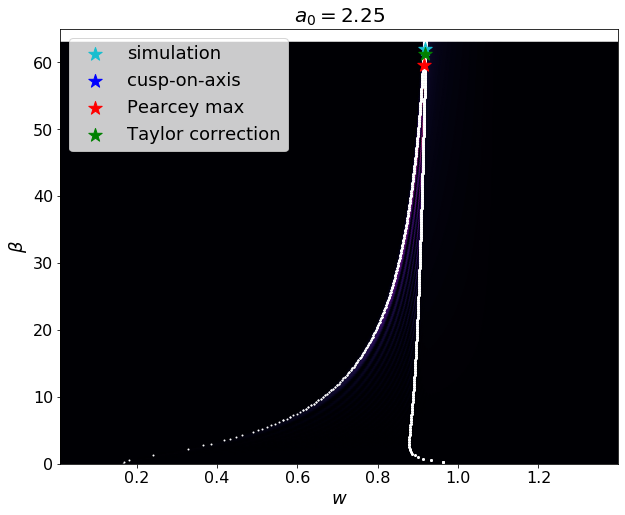

In [29]:
# For a range of a0 values plot folds+cusp plots in (beta, w)
tau = 6*np.pi

n_a0 = a0_arr_tau_6.shape[0]
for idx in range(0, n_a0, 2):
    idx_beta, idx_w = np.where(N_ph_a0_list_tau_6[idx] == N_ph_a0_list_tau_6[idx].max())
    beta_fold, w_fold = calculate_fold_w_beta(beta_arr_tau_6, a0_arr_tau_6[idx],
                                              tau, eps=2e-2)
    
    fig, ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(w_a0_list_tau_6[idx], beta_arr_tau_6, N_ph_a0_list_tau_6[idx],
                   cmap='inferno', shading='gouraud')
    
    plt.plot(w_fold, beta_fold, '.', color='white', markersize=2, zorder=1)
    # for i,(phi, w) in enumerate(data):
    #     plt.plot(w, beta_arr[i]*np.ones_like(w), '.', color='white', markersize=2, zorder=1)
    plt.scatter(w_a0_list_tau_6[idx][idx_w[0]], beta_arr_tau_6[idx_beta[0]], color='tab:cyan', marker='*', s=200, zorder=2, label='simulation')
    plt.scatter(w_cusp[idx], beta_cusp[idx], color='blue', marker='*', s=200, zorder=2, label='cusp-on-axis')
    plt.scatter(w_Pe[idx], beta_Pe[idx], color='red', marker='*', s=200, zorder=2, label='Pearcey max')
    plt.scatter(w_Taylor[idx], beta_Taylor[idx], color='green', marker='*', s=200, zorder=2, label='Taylor correction')

    ax.set_ylim([0.,65.])
    plt.title('$a_0 = {}$'.format(a0_arr_tau_6[idx]), fontsize=20)
    plt.xlabel('$w$', fontsize=18)
    plt.ylabel('$\\beta$', fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(loc='best', fontsize=18)
    plt.show()